In [1]:
%alias package {__import__('sys').executable} -m pip install --quiet --upgrade --upgrade-strategy eager %l

In [2]:
session_storage = 'downloads'

import os
os.makedirs(session_storage, exist_ok=True)

In [3]:
%package fsspec

import fsspec

fs_dataset = fsspec.filesystem(
    'simplecache', 
    target_protocol='https', 
    cache_storage=session_storage
)

In [4]:
%package numpy pandas 

import numpy as np
import pandas as pd
'''
%package swifter
import swifter
swifter.set_defaults(
    npartitions=None,
    dask_thres=1,
    scheduler='processes',
    progress_bar=True,
    progress_bar_desc=None,
    allow_dask_on_strings=True,
    force_parallel=False
)
'''

%package scikit-learn==1.1.3
import sklearn as skl
import sklearn.base
import sklearn.compose
#import sklearn.ensemble
import sklearn.feature_extraction
import sklearn.linear_model
import sklearn.metrics
import sklearn.model_selection
import sklearn.pipeline
#import sklearn.svm

#%package scikit-learn-intelex
#import sklearnex
#sklearnex.patch_sklearn()

#%package xgboost
#import xgboost

In [5]:
#%package tensorflow tensorflow-gpu

import tensorflow as tf
from tensorflow import keras as keras

#from tensorflow.python.ops.numpy_ops import np_config
#np_config.enable_numpy_behavior()

2022-12-09 22:08:48.044987: I tensorflow/core/platform/cpu_feature_guard.cc:193] This TensorFlow binary is optimized with oneAPI Deep Neural Network Library (oneDNN) to use the following CPU instructions in performance-critical operations:  AVX2 AVX512F AVX512_VNNI FMA
To enable them in other operations, rebuild TensorFlow with the appropriate compiler flags.
2022-12-09 22:08:48.395308: I tensorflow/core/util/port.cc:104] oneDNN custom operations are on. You may see slightly different numerical results due to floating-point round-off errors from different computation orders. To turn them off, set the environment variable `TF_ENABLE_ONEDNN_OPTS=0`.
2022-12-09 22:08:49.687853: W tensorflow/compiler/xla/stream_executor/platform/default/dso_loader.cc:64] Could not load dynamic library 'libnvinfer.so.7'; dlerror: libnvinfer.so.7: cannot open shared object file: No such file or directory; LD_LIBRARY_PATH: /usr/local/nvidia/lib:/usr/local/nvidia/lib64:/opt/conda/lib/:/opt/conda/lib/:/opt/cond

In [6]:
%package tensorflow-addons
import tensorflow_addons as tfa

%package tensorboard
%load_ext tensorboard 

/opt/conda/lib/python3.9/site-packages/tensorflow_addons/utils/ensure_tf_install.py:53: UserWarning: Tensorflow Addons supports using Python ops for all Tensorflow versions above or equal to 2.8.0 and strictly below 2.11.0 (nightly versions are not supported). 
 The versions of TensorFlow you are currently using is 2.11.0 and is not supported. 
Some things might work, some things might not.
If you were to encounter a bug, do not file an issue.
If you want to make sure you're using a tested and supported configuration, either change the TensorFlow version or the TensorFlow Addons's version. 
You can find the compatibility matrix in TensorFlow Addon's readme:
https://github.com/tensorflow/addons
  warnings.warn(


In [7]:
%package scikeras

import scikeras as skeras
import scikeras.wrappers

In [8]:
import matplotlib as mpl
%matplotlib inline
%config InlineBackend.figure_formats = ['svg']

import matplotlib.pyplot as plt
def set_constrained_layout(plt):
    plt.rcParams['figure.constrained_layout.use'] = True
set_constrained_layout(plt)

plt.style.use('default')

In [9]:
import matplotlib
import matplotlib.pyplot as plt
import numpy as np

def subplots(
    n, 
    ncols = 1, visible = False, 
    *args, **kwargs
):
    fig, axs = plt.subplots(
        *args, **kwargs,
        ncols=ncols, 
        nrows=int(np.ceil(n / ncols))
    )
    for ax in axs.flatten():
        ax.set(visible=visible)
    return fig, axs

## Dataset

In [14]:
# TODO
df_scripts = pd.read_pickle('./dataset.pkl', compression='gzip')

In [15]:
df_scripts

,movie_name,script_text
0,Reservoir Dogs,[\r\n\r\n\r\n\r\n\r\n\r\n ...
1,How to Train Your Dragon,[\r\n\r\n\r\n HOW T...
2,Scream,[ \r\n ...
3,Groundhog Day,[\r\n\r\n \r\n ...
4,Black Panther,[\r\n\r\n\r\n \r\n BL...
...,...,...
1204,You've Got Mail,[\r\n\r\nYou've Got Mail\r\n\r\n\r\n\r\n\t\t\t...
1205,Youth in Revolt,[ \r\n \r\n\r\n ...
1206,Zero Dark Thirty,[\r\n\r\n \r\n ...
1207,Zerophilia,[\r\n\r\n\r\n\r\n ...


In [16]:
df_scripts = df_scripts.astype({
    'movie_name': 'category'
})

In [17]:
df_scripts = df_scripts.explode('script_text', ignore_index=True)

In [18]:
df_scripts.dropna(inplace=True)
df_scripts.reset_index(drop=True, inplace=True)

In [19]:
df_scripts

,movie_name,script_text
0,Reservoir Dogs,\r\n\r\n\r\n\r\n\r\n\r\n ...
1,How to Train Your Dragon,\r\n\r\n\r\n HOW TO...
2,Scream,\r\n ...
3,Groundhog Day,\r\n\r\n \r\n ...
4,Black Panther,\r\n\r\n\r\n \r\n BLA...
...,...,...
1172,You've Got Mail,\r\n\r\nYou've Got Mail\r\n\r\n\r\n\r\n\t\t\tY...
1173,Youth in Revolt,\r\n \r\n\r\n ...
1174,Zero Dark Thirty,\r\n\r\n \r\n ...
1175,Zerophilia,\r\n\r\n\r\n\r\n ...


TODO
GOAL extract the following features from texts:

Feature engineering TODO list: 
- location: Named Entity Recognition
- character: Named Entity Recognition
    see https://keras.io/examples/nlp/ner_transformers/
    see https://towardsdatascience.com/named-entity-recognition-ner-using-keras-bidirectional-lstm-28cd3f301f54
- convo: ??

sentence embedding?

## Feature Engineering

In [20]:
def str_normalize_eol(s, eol=os.linesep):
    return str.join(eol, str.splitlines(s))

In [21]:
%package joblib

import os
import re

import joblib

class ParagraphExtractor(skl.base.TransformerMixin):
    def __init__(self,
        eol=os.linesep,
        eol_freq_min=2,
        n_jobs=1
    ):
        self.eol = eol
        self.eol_freq_min = eol_freq_min
        self.n_jobs = n_jobs

        self._pattern = re.compile(
            fr'(?:{self.eol}\s*?){{{self.eol_freq_min},}}'
        )

    def fit(self, _X, _y=None):
        return self

    def transform(self, X, _y=None):
        def _impl_single(s):
            nonlocal self
            return re.split(
                self._pattern,
                str_normalize_eol(s, eol=self.eol)
            )

        return joblib.Parallel(n_jobs=self.n_jobs)(
            joblib.delayed(_impl_single)(s)
                for s in X
        )

        
df_scripts['script_paragraphs'] = ParagraphExtractor(n_jobs=-1).fit_transform(
    df_scripts['script_text']#.iloc[:100]
)

In [22]:
df_scripts_para = (
    df_scripts[['movie_name', 'script_paragraphs']]
        .explode('script_paragraphs', ignore_index=True)
)

In [23]:
df_scripts_para['script_paragraphs'] = (
    df_scripts_para['script_paragraphs'].str.strip()
)

In [24]:
df_scripts_para = df_scripts_para[
    # non-empty strings
    df_scripts_para['script_paragraphs'].astype(bool)
]

In [25]:
df_scripts_para['movie_name'] = (
    df_scripts_para['movie_name']
        .cat.remove_unused_categories()
)

In [26]:
df_scripts_para

,movie_name,script_paragraphs
1,Reservoir Dogs,Quentin Tarantino's
2,Reservoir Dogs,R E S E R V O I R D O G S
3,Reservoir Dogs,"October 22, 1990"
4,Reservoir Dogs,-----------------
5,Reservoir Dogs,This movie is dedicated to these following sou...
...,...,...
1999878,Zootopia,NICK\n Flash? Flash? Hundred yard dash?!
1999879,Zootopia,Yep. It's Flash the sloth.
1999880,Zootopia,FLASH\n (several beats)\n ...
1999881,Zootopia,CUT TO BLACK:


In [27]:
import string

def _str_letters(s):
    return s.translate(
        str.maketrans(
            '', '', 
            string.punctuation + string.whitespace
        )
    )

def _df_lower_letters(df):
    return _str_letters(df.str).str.lower()

df_scripts_para = df_scripts_para[
    _df_lower_letters(df_scripts_para['movie_name'])
        != _df_lower_letters(df_scripts_para['script_paragraphs'])
]


In [28]:
df_scripts_para

,movie_name,script_paragraphs
1,Reservoir Dogs,Quentin Tarantino's
3,Reservoir Dogs,"October 22, 1990"
4,Reservoir Dogs,-----------------
5,Reservoir Dogs,This movie is dedicated to these following sou...
6,Reservoir Dogs,inspiration:
...,...,...
1999878,Zootopia,NICK\n Flash? Flash? Hundred yard dash?!
1999879,Zootopia,Yep. It's Flash the sloth.
1999880,Zootopia,FLASH\n (several beats)\n ...
1999881,Zootopia,CUT TO BLACK:


In [29]:
df_n_paras = df_scripts_para.groupby('movie_name').count()
df_n_paras[df_n_paras['script_paragraphs'] < 10]

,script_paragraphs
movie_name,
Ace Ventura: Pet Detective,3
American Outlaws,1
Days of Heaven,2
Erik the Viking,2
Fletch,2
Four Feathers,8
Highlander: Endgame,4
Made,1
Never Been Kissed,5


In [30]:
# TODO treat these samples separately
# e.g. those without line breaks between paragraphs 
# (so only one line break after each para)

df_scripts_outliers = df_scripts_para[
    df_scripts_para['movie_name'].isin(
        df_n_paras[df_n_paras['script_paragraphs'] < 10].index
    )
]
df_scripts_outliers

,movie_name,script_paragraphs
62411,Ace Ventura: Pet Detective,"""ACE VENTUREA, PET DETECTIVE by Jack Bernstein..."
62412,Ace Ventura: Pet Detective,<b><!--\n</b>if (window!= top)\ntop.location.h...
62413,Ace Ventura: Pet Detective,ACE VENTURA\nPET DETECTIVE\nWritten by\nJack B...
124380,American Outlaws,"""American Outlaws"" -- by Roderick Taylor and J..."
531559,Days of Heaven,<b><!--\n</b>if (window!= top)\ntop.location.h...
531560,Days of Heaven,"DAYS OF HEAVEN""\nby Terry Malick\nREVISED: 6/2..."
625485,Erik the Viking,<b><!--\n</b>if (window!= top)\ntop.location.h...
625486,Erik the Viking,ERIK THE VIKING - Terry Jones ---------------\...
683430,Fletch,Fletch - by Phil Alden Robinson from a draft b...
683431,Fletch,"<b> \n</b>body{\n\tfont-family: ""Courier New"",..."


In [31]:
# TODO lxml to parse html
#print(df_scripts[df_scripts['movie_name'] == 'They Script'].iloc[0]['script_text'][:10000])

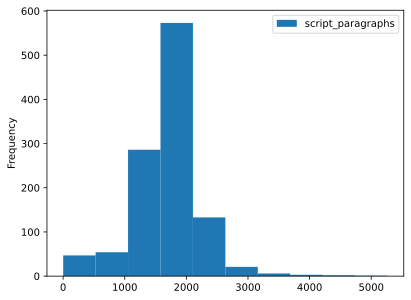

In [32]:
_ = df_n_paras.plot.hist()

## Models

### Neural Network (LSTM RNN)

#### Text Transformers

In [33]:
class KerasTextVectorizer(skl.base.TransformerMixin):
    def __init__(self, 
        vocabulary=None, 
        pad_to_last_sequence=False,
        padding=None,
        **options
    ):
        self._state = dict(
            has_vocab=vocabulary is not None,
            #pad_to_last_sequence=pad_to_last_sequence,
            padding=padding
        )

        self.base = keras.Sequential([
            keras.layers.InputLayer(input_shape=(), dtype='string'),
            keras.layers.TextVectorization(
                **options, 
                name='text_vec',
                ragged=True, #TODO if pad_to_last_sequence else False,
                vocabulary=vocabulary
            )
        ])

    def fit(self, X, _y=None):
        if not self._state['has_vocab']:
            self.base.get_layer('text_vec').adapt(X)

        self.base.compile()
        return self

    def vocabulary_size(self):
        return self.base.get_layer('text_vec').vocabulary_size()

    def transform(self, X, _y=None):
        r = self.base(X)
        if (isinstance(r, tf.RaggedTensor) 
                and self._state.get('pad_to_last_sequence')):
            last_seq_len = self._state.get('last_seq_length')

            if last_seq_len is not None:
                r = r.to_tensor(
                    default_value=self._state.get('padding'), 
                    shape=[None, last_seq_len]
                )
            else:
                r = r.to_tensor()
                self._state['last_seq_length'] = r.shape[-1]
                
        return r

    def __getstate__(self):
        return dict(
            config=self.base.get_config(),
            weights=self.base.get_weights(),
            state=self._state
        )

    def __setstate__(self, d):
        self.base = keras.Sequential.from_config(d['config'])
        if not tf.equal(tf.size(d['weights']), 0):
            self.base.set_weights(d['weights'])
        self._state = d['state']

In [34]:
class SpacyTextVectorizer(KerasTextVectorizer):
    def __init__(self, **kwargs):
        %package spacy[cuda-autodetect,transformers,lookups]

        import spacy
        #import spacy_transformers
        spacy.prefer_gpu()
        
        #spacy.cli.download('en_core_web_lg', False, False, '--quiet')

        nlp = spacy.load('en_core_web_lg')
        super().__init__(
            vocabulary=list(nlp.vocab.strings),
            **kwargs
        )

#### Classifier

In [38]:
class KerasTextClassifier(
    skl.base.BaseEstimator,
    skl.base.ClassifierMixin
):
    def __init__(self, 
        vocabulary=None, 
        compile_kwargs=dict()
    ):
        super().__init__()
        self.vocabulary = vocabulary
        self.compile_kwargs = compile_kwargs

    def fit(self, X, y, **kwargs):
        self.target_encoder = (
            skl.preprocessing.OneHotEncoder(
                handle_unknown='ignore'
            )
        )
        self.target_encoder = self.target_encoder.fit(y)

        self.feature_encoder = (
            keras.layers.TextVectorization(
                output_mode='int',
                ragged=True,
                vocabulary=self.vocabulary
            )
        )
        if self.vocabulary is None:
            self.feature_encoder.adapt(X)

        self.base = keras.Sequential([
            self.feature_encoder,

            keras.layers.Embedding(
                input_dim=self.feature_encoder.vocabulary_size(),
                output_dim=128,
                mask_zero=True
            ),

            keras.layers.SpatialDropout1D(.2),

            keras.layers.Bidirectional(keras.layers.LSTM(64, return_sequences=True)),
            keras.layers.Bidirectional(keras.layers.LSTM(64)),

            keras.layers.Dense(128, activation='relu'),

            keras.layers.Dense(
                units=self.target_encoder.n_classes_,
                activation='softmax'
            )
        ])
        self.base.compile(**self.compile_kwargs)

        y = self.target_encoder.transform(y)
        self.base.fit(X, y, **kwargs)

        return self
        
    def predict(self, X, **kwargs):
        y = self.base.predict(X, **kwargs)
        return self.target_encoder.inverse_transform(y)

    def score(self, X, y, sample_weight=None, **kwargs):
        y_pred = self.predict(X, **kwargs)
        return skl.metrics.balanced_accuracy_score(y, y_pred)

#### Predictor (Vocab From Spacy)

In [125]:
class KerasGridSearchCV:
    def __init__(self, estimator, **options):
        self.estimator = estimator
        self.options = options

    def fit(self, X_data: tf.Tensor, y_data, **kwargs):
        if not tf.is_tensor(X_data):
            self.base = (
                skl.model_selection.GridSearchCV(
                    self.estimator,
                    **self.options
                )
                    .fit(X_data, y_data, **kwargs)
            )
            return self
        
        X_inds = list(range(tf.shape(X_data)[0]))

        def _f(X_ind, y_ind=None):
            nonlocal X_data
            return tf.gather(X_data, X_ind)
        self.base = (
            skl.model_selection.GridSearchCV(
                skl.pipeline.Pipeline([
                    ('indexer', skl.preprocessing.FunctionTransformer(func=_f)),
                    ('estimator', self.estimator)
                ]),
                **self.options
            )
                .fit(X_inds, y_data, **kwargs)
        )
        
        return self

    def best_estimator(self):
        return self.base.best_estimator_.named_steps['estimator']

In [134]:
def get_vocabulary(X, **kwargs):
    v = keras.layers.TextVectorization(**kwargs)
    v.adapt(X)
    return v.get_vocabulary()

class TextClassifierCV(
    skl.base.BaseEstimator,
    skl.base.ClassifierMixin
):
    def __init__(self, 
        options_vectorizer=dict(),
        options_clf=dict(),
        options_gridsearch=dict()
    ):
        super().__init__()
        self.options_vectorizer = options_vectorizer
        self.options_clf = options_clf
        self.options_gridsearch = options_gridsearch

    def fit(self, X, y):
        self.vectorizer = (
            KerasTextVectorizer(
                **self.options_vectorizer,
                output_mode='int',
                sparse=False,
                pad_to_last_sequence=True
            )
                .fit(X)
        )


        #X = self.vectorizer.transform(X)
        self.base = (
            #KerasGridSearchCV(
            skl.model_selection.GridSearchCV(
                KerasTextClassifier(
                    vocabulary=get_vocabulary(X),
                    compile_kwargs=(
                        **self.options_clf,
                        optimizer=tf.keras.optimizers.legacy.Adam(),
                        loss='sparse_categorical_crossentropy',
                        vocabulary_size=self.vectorizer.vocabulary_size(),
                        metrics=['accuracy']
                    )
                ),
                **self.options_gridsearch,
                param_grid={
                    'epochs': [100],
                    'batch_size': [1024],
                    #'estimator__epochs': [100],
                    #'estimator__batch_size': [1024],
                    #'optimizer__learning_rate': [.01]
                },
                cv=skl.model_selection.RepeatedStratifiedKFold(
                    n_splits=3, n_repeats=1
                )
            )
                .fit(X, y)
        )

        return self

    def best_model(self):
        return skl.pipeline.Pipeline([
            ('vectorizer', self.vectorizer),
            #('model', self.base.best_estimator_)
            ('model', self.base.best_estimator())
        ])

    #def predict(self, X):
    #    X = self.vectorizer.transform(X)
    #    return self.base.predict(X)
#
    #def score(self, X, y):
    #    X = self.vectorizer.transform(X)
    #    return self.base.score(X, y)

In [135]:
class IMSDBParagraphTrainer:
    def __init__(self, 
        col_name='movie_name', 
        col_script_paragraphs='script_paragraphs',
        options_clf=dict(),
        options_gridsearch=dict()
    ):
        self.col_name = col_name
        self.col_script_paragraphs = col_script_paragraphs

        self.base = TextClassifierCV(
            options_vectorizer=dict(
                max_tokens=None,
                standardize='lower_and_strip_punctuation',
                split='whitespace',
                #ngrams=(1, 2),
                #output_sequence_length=64
            ),
            options_clf=dict(
                **options_clf,
            ),
            options_gridsearch=dict(
                refit=True,
                **options_gridsearch
            )
        )

    def fit(self, df: pd.DataFrame):
        self.base = self.base.fit(
            X=df[self.col_script_paragraphs],
            y=df[self.col_name]
        )
        return self

    #def predict(self, script_paragraphs: pd.Series):
    #    return self.base.predict(script_paragraphs)

    def best_model(self):
        return self.base.best_model()

    def best_score(self):
        return self.base.base.best_score_

In [136]:
#%tensorboard --logdir '{session_storage}/tensorboard/model_nn_spacy'

model = IMSDBParagraphTrainer(
    options_clf=dict(
        verbose=0,
        callbacks=[
            #keras.callbacks.TensorBoard(
            #    fr'{session_storage}/tensorboard/model_nn_spacy'
            #),
            tfa.callbacks.TQDMProgressBar(
                show_epoch_progress=False
            )
            #keras.callbacks.EarlyStopping(
            #    monitor='loss', 
            #    patience=3, 
            #    min_delta=0.0001
            #)
        ]
    ),
    options_gridsearch=dict(
        verbose=3,
        #n_jobs=-1
    )
)

Train on the first few samples

In [137]:
df_scripts_para_ = df_scripts_para.drop(df_scripts_outliers.index)
df_scripts_para_ = df_scripts_para_[
    df_scripts_para_['movie_name'].isin(
        pd.Series(df_scripts_para_['movie_name'].unique()).head(100)
    )
]
df_scripts_para_['movie_name'] = (
    df_scripts_para_['movie_name']
        .cat.remove_unused_categories()
)
df_scripts_para_ = df_scripts_para_.groupby('movie_name').head(100)

_ = model.fit(df_scripts_para_)

Fitting 3 folds for each of 1 candidates, totalling 3 fits
[CV 1/3] END .........batch_size=1024, epochs=100;, score=nan total time=   0.0s
[CV 2/3] END .........batch_size=1024, epochs=100;, score=nan total time=   0.0s
[CV 3/3] END .........batch_size=1024, epochs=100;, score=nan total time=   0.0s


ValueError: 
All the 3 fits failed.
It is very likely that your model is misconfigured.
You can try to debug the error by setting error_score='raise'.

Below are more details about the failures:
--------------------------------------------------------------------------------
1 fits failed with the following error:
Traceback (most recent call last):
  File "/opt/conda/lib/python3.9/site-packages/sklearn/model_selection/_validation.py", line 686, in _fit_and_score
    estimator.fit(X_train, y_train, **fit_params)
  File "/tmp/ipykernel_282779/506477198.py", line 66, in fit
    return super().fit(X, y, sample_weight, **kwargs)
  File "/opt/conda/lib/python3.9/site-packages/scikeras/wrappers.py", line 1494, in fit
    super().fit(X=X, y=y, sample_weight=sample_weight, **kwargs)
  File "/opt/conda/lib/python3.9/site-packages/scikeras/wrappers.py", line 762, in fit
    self._fit(
  File "/opt/conda/lib/python3.9/site-packages/scikeras/wrappers.py", line 918, in _fit
    X, y = self._initialize(X, y)
  File "/opt/conda/lib/python3.9/site-packages/scikeras/wrappers.py", line 846, in _initialize
    X, y = self._validate_data(X, y, reset=True)
  File "/opt/conda/lib/python3.9/site-packages/scikeras/wrappers.py", line 618, in _validate_data
    X, y = check_X_y(
  File "/opt/conda/lib/python3.9/site-packages/sklearn/utils/validation.py", line 1074, in check_X_y
    (columns). The default value of 1 rejects empty datasets.
  File "/opt/conda/lib/python3.9/site-packages/sklearn/utils/validation.py", line 879, in check_array
    raise ValueError(
ValueError: Expected 2D array, got 1D array instead:
array=["Quentin Tarantino's" 'October 22, 1990' '-----------------' ...
 '275\tASH\t\t\t\t\t\t\t\t\t\t\t\t 275\n\t   spins, raises his shotgun and fires.\n\t   BLAMITY-BLAM!\n\t   The window is ripped away in a shower of glass.\n276\tASH\'S P.O.V. - THROUGH THE BROKEN WINDOW\t\t\t\t    276\n\t   Only the night woods.  The "gnarled hand" comes back, sweeping\n\t   down in front of the broken window, but it\'s revealed to be just\n\t   a tree branch swaying in the wind.\n277\tASH\t\t\t\t\t\t\t\t\t\t\t\t 277\n\t   reloads. He moves to the front door and peers out through a\n\t   crack.\n278\tASH\'S EYEBALL\t\t\t\t\t\t\t\t\t\t 278\n\t   through the crack in the door.\n279\tASH\'S P.O.V. - THE WOODS BEYOND\t\t\t\t\t\t   279\n\t   CAMERA pushes through the crack to the woods beyond.  There is\n\t   movement.\n280\tLONG SHOT - EXT. MILL\t\t\t\t\t\t\t\t   280\n\t   The tiny figure of Ash steps from the Mill.\n281\tCLOSE UP - ASH\t\t\t\t\t\t\t\t\t\t281\n\t   He sweeps the barrel of the shotgun toward the sound of sticks\n\t   breaking.\n282\tASH\'S TERRIFIED HORSE\t\t\t\t\t\t\t\t   282\n\t   It rears up on it\'s hind legs. It\'s front hoofs come down toward\n\t   Ash.\n283\tA STARTLED ASH\t\t\t\t\t\t\t\t\t\t283\n\t   leaps aside just in time.\n284\tASH\t\t\t\t\t\t\t\t\t\t\t\t 284\n\t   snags the horse\'s reigns.\n\t\t\t\t\t   ASH\n\t\t\t   Easy, boy.\n\t   The horse calms.  Ash ties it to a tree, patting it\'s head. A\n\t   shadow passes behind him. He turns toward the Mill.\n285\tASH\'S P.O.V.  THROUGH THE MILL\'S OPEN DOOR\t\t\t\t  285\n\t   He sees am image of himself inside the Mill. Peering out.\n286\tEXT. MILL\t\t\t\t\t\t\t\t\t\t\t286\n\t   ASH\n\t   stares in disbelief, then the wind slams the front door of the\n\t   Mill, halting Ash\'s view. Ash races for the Mill.\n287\tINT. MILL\t\t\t\t\t\t\t\t\t\t\t287\n\t   ASH\n\t   races through the door and toward CAMERA when...SMASH...Ash\'s\n\t   reflection shatters. He\'s run into a mirror. Shivering, he picks\n\t   himself up from the pile of broken glass. He moves to the\n\t   fireplace and hunches before the flames, CAMERA PANS TO....\n288\tTHE SHATTERED MIRROR PIECES\t\t\t\t\t\t\t  288\n\t   Each piece of mirror reflects an image of Ash.  From the eight\n\t   pieces of mirror spring...\n289\tEIGHT TINY ASHES\t\t\t\t\t\t\t\t\t   289\n\t   Two inch high versions of himself.  They leap from the mirror\n\t   fragments and land on the floor.\n290\tASH\t\t\t\t\t\t\t\t\t\t\t\t 290\n\t   is unaware of them as he kneels close to the fire.\n291\tTINY ASH #1, #2, AND #3\t\t\t\t\t\t\t\t 291\n\t   grab a discarded dinner fork.  Like men on a battering ram, they\n\t   race forward to jam it into Ash\'s buttocks.\n292\tASH\t\t\t\t\t\t\t\t\t\t\t\t 292\n\t   SCREAMS in agony and jerks forward, banging his head into the\n\t   stove pipe.\n293\tTINY ASH #4, #5, AND #6\t\t\t\t\t\t\t\t 293\n\t   lift the barrel of the shotgun in Ash\'s direction.  Another\n\t   leaps upon the shotgun\'s trigger. BOOM!\n294\tASH\t\t\t\t\t\t\t\t\t\t\t\t 294\n\t   barely dives away from the blast the would have taken his head\n\t   off.\n295\tTHE TINY ASHES\t\t\t\t\t\t\t\t\t\t295\n\t   SHRIEK with uncontrollable laughter.  They jump away from the\n\t   shotgun and scurry off across the floor.\n296\tASH\t\t\t\t\t\t\t\t\t\t\t\t 296\n\t   pulls the fork from his buttocks and heaves it.\n297\tTINY ASH #1\t\t\t\t\t\t\t\t\t\t   297\n\t   is running for his life, as fast as his tiny legs will carry\n\t   him.\n298\tTRACKING SHOT - THE FORK\t\t\t\t\t\t\t\t298\n\t   a giant projectile as it ROARS AT CAMERA. PAN with it as it\n\t   WHOOSHES past.\n\t   FA-THONG!\n299\tTHE FORK\t\t\t\t\t\t\t\t\t\t\t 299\n\t   skewers tiny Ash #1 to the wooden wall of the mill.\n300\tASH\t\t\t\t\t\t\t\t\t\t\t\t 300\n\t   stumbles over a broom handle that has been thrust out in front\n\t   of him by other tiny ASHES.  His head slams into a stove pipe.\n\t   He crumples.  He lands with his cheek pressed against the hot\n\t   stove.  SSSSSSssss.  He pries his face loose with a spatula.\n301\tA BUCKET OF GREASE\t\t\t\t\t\t\t\t\t 301\n\t   is pushed off a high shelf.\n\t   CLANG!\n302\tIT LANDS ON ASH\'S HEAD\t\t\t\t\t\t\t\t  302\n\t   and spills slippery grease about the floor.\n303\tASH\t\t\t\t\t\t\t\t\t\t\t\t 303\n\t   with an upside-down bucket on his head, slips and falls, back\n\t   and forth on the grease.  He stands and tries to dislodge the\n\t   bucket.  He trips over the broom handle, again thrust in his\n\t   path.  He falls backward, onto a crochet basket with knitting\n\t   needles jutting from it.\n304\tBUCKET-HEADED ASH\t\t\t\t\t\t\t\t\t  304\n\t   SCREAMS and jerks upward, slamming his bucket head into the\n\t   stove pipe.  CLANG!  Ash rips the bucket from his head then yanks\n\t   the needles from his buttocks.  He looks about for the little\n\t   imps.\n305\tTINY ASH #2\t\t\t\t\t\t\t\t\t\t   305\n\t   crouching behind a log attempting to hide.  BUT...\n306\tASH\t\t\t\t\t\t\t\t\t\t\t\t 306\n\t   has seen him.  He "accidentally" elbows the log and Tiny Ash\n\t   #2 into the stove\'s fire.\n\t\t\t\t\t   ASH\n\t\t\t   Ooops.\n307\tTINY ASH #2\t\t\t\t\t\t\t\t\t\t   307\n\t   is burned alive.\n308\tASH\t\t\t\t\t\t\t\t\t\t\t\t 308\n\t   glances downward at the pitter patter sound of tiny feet.\n309\tTINY ASH #3\t\t\t\t\t\t\t\t\t\t   309\n\t   is dashing across the open expanse of floor.  Ash\'s gigantic\n\t   foot comes down to crush the little man.  Tiny Ash #3 raises\n\t   a rusty nail into the path of the descending foot.\n\t   RIP!!\n310\tTHE NAIL RIPS\t\t\t\t\t\t\t\t\t\t 310\n\t   through Ash\'s shoe.\n311\tASH\t\t\t\t\t\t\t\t\t\t\t\t 311\n\t   jerks his leg upward in pain.  Ash dances about the place\n\t   hopping on one foot, HOWLING. He strays into the greasy area\n\t   of the floor and stumbles over the broomstick again thrust in\n\t   his path, swung there by Tiny ASHES #6, #7 and #8. He almost\n\t   regains his balance when he strays into the oil patch, falls,\n\t   and hits his head on the stone floor. BLACKNESS.\n312\tASH\t\t\t\t\t\t\t\t\t\t\t\t 312\n\t   awakens on the floor of the Mill, like Gulliver he is bound with\n\t   tiny ropes.  Directly above him, on the edge of a table...\n313\tTINY ASHES #4 AND #5\t\t\t\t\t\t\t\t    313\n\t   suspend Tiny Ash #6 by his legs.\n314\tTINY ASH #7 AND #8\t\t\t\t\t\t\t\t\t 314\n\t   stand atop Ash\'s face.  They push from either side of his\n\t   nostrils, plugging his nose.  Ash\'s mouth opens as he gasps for\n\t   air.  As he inhales...\n315\tSUSPENDED TINY ASH #6\t\t\t\t\t\t\t\t   315\n\t   is released.\n316\tTINY ASH #6 - SLOW MOTION - WIND FAN\t\t\t\t\t   316\n\t   He free falls for a moment, then the tiny body arcing to form\n\t   a perfect swam dive, plunges down into Ash\'s opened throat.\n317\tASH\t\t\t\t\t\t\t\t\t\t\t\t 317\n\t   inhales the living beast whole.  He chokes violently.  He breaks\n\t   his bonds an he hacks for breath.  He puts his finger down his\n\t   throat, trying to make himself vomit up the little man, to no\n\t   avail.\n\t   He looks about to crush some of the little ASHES but they are\n\t   gone.  He places his hand on his stomach and dizzily stumbles\n\t   to a chair.  He goes pale.\n\t\t\t\t\t   ASH\n\t\t\t   Nasty little thing\'s inside me.\n\t   He stands indignant but double over in sudden pain.\n\t\t\t   Well let\'s see how you like a\n\t\t\t   little hot water!\n\t   He grabs the hot kettle from the stove and pours the scalding\n\t   contents painfully down his throat.  He sets down the kettle\n\t   and waits for a moment.  A tiny SCREAM emits from Ash\'s stomach\n\t   ASH\n\t   emits a bark of LAUGHTER. He clutches as his chest.  Then his\n\t   arm.  He rips back his shirt sleeve.\n318\tCLOSE ON ASH\'S ARM - STOP MOTION ANIMATION\t\t\t\t  318\n\t   We can see the outline of Tiny Ash #6\'s body squirming down\n\t   Ash\'s arm, just beneath the skin.\n319\tASH\t\t\t\t\t\t\t\t\t\t\t\t 319\n\t   watches in horror as...\n320\tTHE TINY FIGURE\t\t\t\t\t\t\t\t\t    320\n\t   squirms down his wrist and disappears into his iron hand.  The\n\t   Iron hand snaps open and closes uncontrollably. The possessed\n\t   iron hand swings at him.\n321\tTHE IRON HAND\t\t\t\t\t\t\t\t\t\t 321\n\t   connects with an uppercut that knocks Ash out of frame.\n322\tASH\t\t\t\t\t\t\t\t\t\t\t\t 322\n\t   lands next to an iron vice. He reaches for the EVIL HAND.  But\n\t   the hand has grabbed a mallet that BONK-BONKS him on the head.\n\t   Ash is groggy as he is grabbed by the hair and yanked down into\n\t   the opened vice.\n323\tTHE EVIL IRON HAND\t\t\t\t\t\t\t\t\t 323\n\t   cranks the vice\'s handle.\n324\tTHE VICE\t\t\t\t\t\t\t\t\t\t\t 324\n\t   tightens around Ash\'s head.  Trapped, he looks to...\n325\tTHE EVIL HAND\t\t\t\t\t\t\t\t\t\t 325\n\t   rummaging through a wooden toolbox.  It comes upon a crude wooden\n\t   punch.\n326\tANGLE - THE EVIL HAND - UNDERCRANKED\t\t\t\t\t   326\n\t   stabs rapidly at Ash\'s good hand.  But Ash expertly dodges each\n\t   stab with an opening of the fingers or a closing of the thumb\n\t   is super fast motion.\n327\tASH\t\t\t\t\t\t\t\t\t\t\t\t 327\n\t   with is head still wedged in the vice.\n\t\t\t\t\t   ASH\n\t\t\t   Why you dirty little...AHHHHHH!!\n328\tA PAIR OF IRON PLIERS\t\t\t\t\t\t\t\t   328\n\t   has entered frame and clamps down upon Ash\'s nose.  He emits\n\t   a nasal SCREAM and shakes the pliers loose.\n\t\t\t\t\t   ASH\n\t\t\t   Soon as I get out of this thing\n\t\t\t   I... YIEEEE!!\n\t   THE PAIR OF IRON PLIERS\n\t   dip into Ash\'s mouth and clamps down upon a back molar.\n\t\t\t\t\t   ASH\n\t\t\t   No!  Not the teeth!\n\t   YANK!\n329\tTHE EVIL HAND\t\t\t\t\t\t\t\t\t\t 329\n\t   jerks his rear MOLAR from his head and holds up the tooth for\n\t   his inspection.  It sets the tooth down nearly in front of him.\n\t   The Evil hand forms a fist and crushes the tooth to dust.  It\n\t   scurries from view.\n330\tASH\'S HEAD\t\t\t\t\t\t\t\t\t\t    330\n\t   struggling in the grip of the vice.\n\t\t\t\t\t   ASH\n\t\t\t   Where the hell are ya!?\n331\tTHE EVIL HAND\t\t\t\t\t\t\t\t\t\t 331\n\t   grabs a red hot fireplace poker from the fire.\n\t\t\t\t\t   ASH\n\t\t\t   I can\'t see ya!!\n\t   HIS EVIL HAND\n\t   raises a red hot fireplace poker and presses it against the\n\t   right half of his body.\n\t\t\t\t\t   ASH\n\t\t\t   No, no--not the poke--\n\t   SSSSsssssssss!\n332\tASH\t\t\t\t\t\t\t\t\t\t\t\t 332\n\t   jerks his head free from the vice with a SCREAM.  He holds up\n\t   his iron hand.  It\'s back to normal.  Again under his control.\n\t\t\t\t\t   ASH\n\t\t\t   Okay then.\n\t   But he halts abruptly as he feels a strange sensation: His\n\t   shoulder itches.  He scratches it.  The Itch grows.  It itches\n\t   madly.  He rips back his shirt.  Upon his shoulder... THERE\n\t   BLINKS A THIRD EYEBALL!!!\n333\tTHE CAMERA RACES INTO THIS HIDEOUS SIGHT\t\t\t\t    333\n\t   It is the eyeball of EVIL ASH.  Beneath it, a mouth and nose\n\t   begin to take shape on the surface of Ash\'s back.\n334\tASH\t\t\t\t\t\t\t\t\t\t\t\t 334\n\t   SHRIEKS and SHRIEKS and races out of the mill.  The CAMERA\n\t   follows him in docu-horror style as he flees into the dark\n\t   woods.\n335\tEXT. WOODS - 12MM LENSE - NIGHT\t\t\t\t\t\t   335\n\t   ASH\n\t   staggers about in a frenzy, stumbling over logs and through the'
 "WISEMAN JOHN\n\t\t\t   Did you speak the exact words?!\n\t\t\t\t\t   ASH\n\t\t\t   Well, maybe not every single\n\t\t\t   syllable, no.  But basically I\n\t\t\t   said them.  Yes.\n438\tWISEMAN JOHN\t\t\t\t\t\t\t\t\t\t  439\n\t   bows his head, stung by this information.\n\t\t\t\t\t   WISEMAN JOHN\n\t\t\t   Dung eating fool!  Thou hast doomed\n\t\t\t   us. When thou misspoke the words\n\t\t\t   the Army of the Dead was awoke.\n\t\t\t\t\t   ASH\n\t\t\t   Hey. We had a deal. You told me,\n\t\t\t   you could clean this thing up,\n\t\t\t   once I got you the book. You said\n\t\t\t   there was a passage in there that\n\t\t\t   could get rid of this thing and\n\t\t\t   send me back.\n\t\t\t\t\t   WISEMAN JOHN\n\t\t\t   The passage is useless to us as\n\t\t\t   long as these evil dead walk. They\n\t\t\t   have a terrible desire for this\n\t\t\t   book. And they shall come here\n\t\t\t   to get it. Once in their\n\t\t\t   possession, the Evil shall rule\n\t\t\t   the Earth for one thousand\n\t\t\t   years...Because of you...we are\n\t\t\t   doomed.\n\t\t\t\t\t   ASH\n\t\t\t   You wanted the damn book. You got\n\t\t\t   yer book. I did my part of the\n\t\t\t   deal.\n\t\t\t\t\t   WISEMAN JOHN\n\t\t\t   We did strike a bargain. I will\n\t\t\t   return you to your own time as\n\t\t\t   promised.\n\t\t\t\t\t   ASH\n\t\t\t   Yeah. Well good. That was the\n\t\t\t   deal.  So uh...when do you think\n\t\t\t   we can...\n439\tASH\t\t\t\t\t\t\t\t\t\t\t\t 439\n\t   looks about at the condemned faces.\n440\tASH'S P.O.V. - THE VILLAGERS\t\t\t\t\t\t\t 440\n\t   CAMERA PANS past the doomed faces in the crowd.\n\t\t\t\t\t   ASH\n\t\t\t   I mean...when can you send me...\n441\tASH\t\t\t\t\t\t\t\t\t\t\t\t 441\n\t   sees Sheila, but looks away, consumed with the guilt that he's\n\t   doomed her.\n\t\t\t\t\t   ARTHUR\n\t\t\t   The Wisemen were fools to believe\n\t\t\t   that you were the Promised one.\n\t\t\t   That one such as you could have\n\t\t\t   saved us!.\n442\tASH\t\t\t\t\t\t\t\t\t\t\t\t 442\n\t   is solemn.\n443\tARTHUR\t\t\t\t\t\t\t\t\t\t\t   443\n\t   and the others turn away in contempt.\n444\tSHEILA\t\t\t\t\t\t\t\t\t\t\t   444\n\t   moves closer.\n\t\t\t\t\t   SHEILA\n\t\t\t   I still believe that thou wilt\n\t\t\t   help us.\n\t\t\t\t\t   ASH\n\t\t\t   No.. They're right.  I screwed\n\t\t\t   up. I didn't come through for you,\n\t\t\t   and...  I'm sorry for it.\n\t\t\t\t\t   SHEILA\n\t\t\t   I still have faith in thee. In\n\t\t\t   my heart I know thou wilt still\n\t\t\t   succeed.\n\t\t\t\t\t   ASH\n\t\t\t   Sheila... It's over for me. I\n\t\t\t   don't belong here and I'm going\n\t\t\t   home. I didn't have what it took.\n\t\t\t   It's over.\n\t   He bows his head and moves off.\n\t   A high pitched SHRIEK is heard!\n445\tALL HEADS\t\t\t\t\t\t\t\t\t\t\t445\n\t   look to the sky.\n446\tTWO WINGED DEADITES\t\t\t\t\t\t\t\t\t446\n\t   possessed women with bat-like wings, swoop down.\n447\tTEN VILLAGERS\t\t\t\t\t\t\t\t\t\t 447\n\t   scream as they flee from the winged beasts.\n448\tWINGED DEADITE #1\t\t\t\t\t\t\t\t\t  448\n\t   Like a delta winged F-15, it banks towards Sheila.\n\t\t\t\t\t   ASH\n\t\t\t   No!\n449\tASH\t\t\t\t\t\t\t\t\t\t\t\t 449\n\t   races to intercept.  He plants himself between Sheila and the\n\t   beast.\n450\tWINGED DEADITE #1 - POV\t\t\t\t\t\t\t\t 450\n\t   As it swoops at Ash.\n451\tASH\t\t\t\t\t\t\t\t\t\t\t\t 451\n\t   opens his steel hand, then clamps it closed again on the handle\n\t   of his sword.\n452\tASKEW ANGLE\t\t\t\t\t\t\t\t\t\t   452\n\t   The immense shadow of the broad winged Deadite falls over Ash.\n453\tASH\t\t\t\t\t\t\t\t\t\t\t\t 453\n\t   swings his sword upward.\n454\tCLOSE SHOT - THE BLADE\t\t\t\t\t\t\t\t  454\n\t   severs the tip of the Beast's rotted wing.\n455\tTHE FLYING DEADITE\t\t\t\t\t\t\t\t\t 455\n\t   shrieks in pain as it soars over Ash. No longer aerodynamically\n\t   sound, it crashes to the ground.\n456\tA GROUP OF WARRIORS\t\t\t\t\t\t\t\t\t456\n\t   fire their arrows into the beast, pegging it to a tree.  The\n\t   bone white eyes of the creature darken.\n457\tASH AND ARTHUR\t\t\t\t\t\t\t\t\t\t457\n\t   spin to the sound of a woman's SCREAM.\n458\tSHEILA\t\t\t\t\t\t\t\t\t\t\t   458\n\t   in the clutches of WINGED DEADITE #2.\n\t\t\t\t\t   SHEILA\n\t\t\t   M'Lord Ash!  Help me!\n\t   The beast flies off with the fair maiden, soaring over the\n\t   castle wall and into the distance.\n459\tASH\t\t\t\t\t\t\t\t\t\t\t\t 459\n\t   shakes his fist at the receding beast.\n\t\t\t\t\t   ASH\n\t\t\t   Damn you!\n460\tTHREE MOUNTED SCOUTS\t\t\t\t\t\t\t\t    460\n\t   come riding in through the castle doors.\n\t\t\t\t\t   SCOUT\n\t\t\t   An army of the dead!  They have\n\t\t\t   gathered in the wilderness and\n\t\t\t   come this way.\n\t\t\t\t\t   ARTHUR\n\t\t\t   How far from here?\n\t\t\t\t\t   SCOUT\n\t\t\t   But two days ride.\n\t\t\t\t\t   ARTHUR\n\t\t\t   Then these winged ones are only\n\t\t\t   the first of them.\n\t\t\t\t\t   WISEMAN\n\t\t\t   Perhaps we should go from this\n\t\t\t   place while we can.\n\t\t\t\t\t   GOLD TOOTH\n\t\t\t   We could be safe in the mountains.\n\t\t\t\t\t   WARRIORS\n\t\t\t   Yes!  To the mountains!  We must flee!\n\t\t\t   They'll take our souls!\n461\tANGLE ON\t\t\t\t\t\t\t\t\t\t\t 461\n\t   BLAMMITY-BLAM!\n\t   All eyes look to...\n462\tASH\t\t\t\t\t\t\t\t\t\t\t\t 462\n\t   who stands on a high castle wall, clutching his smoldering\n\t   shotgun.\n\t\t\t\t\t   ASH\n\t\t\t   Go ahead and run.  Run home and\n\t\t\t   cry to mama.  I'm through runnin'.\n\t\t\t   I stay we stay and fight.\n463\tARTHUR\t\t\t\t\t\t\t\t\t\t\t   463\n\t   takes a challenging step forward.\n\t\t\t\t\t   ARTHUR\n\t\t\t   How will we stop an army of the\n\t\t\t   dead at out castle walls?  How will\n\t\t\t   you fight that?!  With more words?\n\t\t\t   Most of out people have already\n\t\t\t   fled.  We are but forty men.\n\t\t\t\t\t   ASH\n\t\t\t   We'll get Henry the Red and his\n\t\t\t   men to fight with us.\n\t\t\t\t\t   ARTHUR\n\t\t\t   We shall not stand in battle,\n\t\t\t   alongside the likes of him. Our\n\t\t\t   honor will not allow it.\n\t\t\t\t\t   ASH\n\t\t\t   Then you'll die.  Honor and all.\n\t\t\t   Now who's with me?\n464\tTHE CROWD\t\t\t\t\t\t\t\t\t\t\t464\n\t   is silent as they consider Ash's words. Then from the rear, the\n\t   Village Blacksmith steps forward.\n\t\t\t\t\t   BLACKSMITH\n\t\t\t   I'll stand by you.\n465\tA WARRIOR\t\t\t\t\t\t\t\t\t\t\t465\n\t   steps forward. Then another.\n\t\t\t\t\t   WARRIOR #7\n\t\t\t   You may count on my steel.\n\t\t\t\t\t   WARRIOR #8\n\t\t\t   And mine!\n466\tTHE CROWD\t\t\t\t\t\t\t\t\t\t\t466\n\t   steps forward vowing their allegiance to the cause.\n467\tARTHUR\t\t\t\t\t\t\t\t\t\t\t   467\n\t   reluctantly joins them.\n468\tEXT. GRAVEYARD - STOP MOTION ANIMATION - NIGHT\t\t\t   468\n\t   EVIL ASH\n\t   directs teams of skeletons to dig at the graves.\n\t\t\t\t\t   EVIL ASH\n\t\t\t   Dig!  Dig faster!  I want every black\n\t\t\t   hearted, worm infested, son of\n\t\t\t   a bitch that ever died in battle!\n\t\t\t   We'll storm their castle and take\n\t\t\t   the book!  Then my lads, eternal\n\t\t\t   life shall by ours!\n469\tSTOP MOTION ANIMATION - THREE SKELETONS\t\t\t\t\t469\n\t   hoist up a stone casket from the ground and with rusted swords\n\t   pry it open, releasing another skeleton who stands to join their\n\t   ranks.\n470\tTWO ARMORED SKELETONS\t\t\t\t\t\t\t\t   470\n\t   push a bruised Sheila to her knees before Evil Ash.\n471\tCLOSE ON SHEILA\t\t\t\t\t\t\t\t\t    471\n\t   looking up to Evil Ash in fear. His boney finger comes down into\n\t   frame and strokes her lovely cheek.  She pulls away in\n\t   revulsion.\n472\tEVIL ASH\t\t\t\t\t\t\t\t\t\t\t 472\n\t   looks down at her with lust.\n\t\t\t\t\t   EVIL ASH\n\t\t\t   Why ain't you a sweet little\n\t\t\t   thing?\n\t   His boney digit caresses her lips.\n\t\t\t\t\t   SHEILA\n\t\t\t   Don't touch me!  You foul thing!\n\t\t\t\t\t   EVIL ASH\n\t\t\t   Your gonna learn to live me missy.\n\t\t\t\t\t   SHEILA\n\t\t\t   The Promised one will come for\n\t\t\t   you.\n\t   SKELETAL EVIL ASH"
 "639\tA BARREN TREE\t\t\t\t\t\t\t\t\t\t 639\n\t   sprouts buds, they swell forming leaves which change to the\n\t   brilliant colors of fall then drop.\n640\tA FROST\t\t\t\t\t\t\t\t\t\t\t  640\n\t   covers Ash.\n641\tICICLES\t\t\t\t\t\t\t\t\t\t\t  641\n\t   on the ceiling of the cave melt.  The water drops down onto\n\t   Ash's face.  He stirs.\n642\tASH\t\t\t\t\t\t\t\t\t\t\t\t 642\n\t   awakens in a heap of rusted scrap, which was once the\n\t   Deathcoaster. His clothes and armor having deteriorated, he is\n\t   buck ass naked as he staggers to the mouth of the cave. He digs\n\t   at the rocks that block the cave's entrance.  Sunlight streams\n\t   into the hole he has created.\n643\tEXT. HILLSIDE\t\t\t\t\t\t\t\t\t\t 643\n\t   ASH\n\t   climbs from the cave and steps into the sunlight.\n\t\t\t\t\t   ASH (V.O.)\n\t\t\t   And when I awoke...\n644\tASH\t\t\t\t\t\t\t\t\t\t\t\t 644\n\t   beholds...\n645\tA FUTURISTIC CITY -\t\t\t\t\t\t\t\t\t645\n\t   after the next Nuclear war: a dead land.\n646\tASH'S P.O.V.\t\t\t\t\t\t\t\t\t\t  646\n\t   A FRACTURED CLOCK TOWER\n\t   lays sprawled on its side.  The time of mankind's death frozen\n\t   on the cracked face of the clock.\n647\tA SHATTERED BRIDGE\t\t\t\t\t\t\t\t\t 647\n\t   abruptly ends, a third of the way across a river it once\n\t   spanned.  Upon it, rest heaps of futuristic, yet rusted taxicabs\n\t   piled eight deep in some places.\n\t   CAMERA PULLS BACK from a stunned Ash, amidst the atomized pieces\n\t   of iron and bone.\n\t\t\t\t\t   ASH\n\t\t\t   ....I found that I had slept too\n\t\t\t   long.\n648\tASH\t\t\t\t\t\t\t\t\t\t\t\t 648\n\t   is so small a dot now, and so far away, that we almost can't\n\t   hear his terrified SCREAM!\n\t\t\t\t\t\t\t\t\t   CUT TO BLACK.\n\t\t\t\t\t\t\t  THE END."].
Reshape your data either using array.reshape(-1, 1) if your data has a single feature or array.reshape(1, -1) if it contains a single sample.

--------------------------------------------------------------------------------
1 fits failed with the following error:
Traceback (most recent call last):
  File "/opt/conda/lib/python3.9/site-packages/sklearn/model_selection/_validation.py", line 686, in _fit_and_score
    estimator.fit(X_train, y_train, **fit_params)
  File "/tmp/ipykernel_282779/506477198.py", line 66, in fit
    return super().fit(X, y, sample_weight, **kwargs)
  File "/opt/conda/lib/python3.9/site-packages/scikeras/wrappers.py", line 1494, in fit
    super().fit(X=X, y=y, sample_weight=sample_weight, **kwargs)
  File "/opt/conda/lib/python3.9/site-packages/scikeras/wrappers.py", line 762, in fit
    self._fit(
  File "/opt/conda/lib/python3.9/site-packages/scikeras/wrappers.py", line 918, in _fit
    X, y = self._initialize(X, y)
  File "/opt/conda/lib/python3.9/site-packages/scikeras/wrappers.py", line 846, in _initialize
    X, y = self._validate_data(X, y, reset=True)
  File "/opt/conda/lib/python3.9/site-packages/scikeras/wrappers.py", line 618, in _validate_data
    X, y = check_X_y(
  File "/opt/conda/lib/python3.9/site-packages/sklearn/utils/validation.py", line 1074, in check_X_y
    (columns). The default value of 1 rejects empty datasets.
  File "/opt/conda/lib/python3.9/site-packages/sklearn/utils/validation.py", line 879, in check_array
    raise ValueError(
ValueError: Expected 2D array, got 1D array instead:
array=['-----------------'
 'This movie is dedicated to these following sources of' 'inspiration:'
 ...
 "yanks her to her feet.\n\t\t\t\t\t   EVIL ASH\n\t\t\t   Darlin' I'm gonna save him the\n\t\t\t   trouble.\n\t   He clutches her squirming body in a boney embrace.\n473\tEXT. GRAVEYARD - LONG SHOT\t\t\t\t\t\t\t   473\n\t   Silhouetted by the large full moon, Evil Ash forces his kiss\n\t   upon Sheila.  Around them, the skeletons sharpen their swords\n\t   on tombstones.\n\t\t\t\t\t\t\t\t\t   DISSOLVE TO:\n474\tEXT. VAST VISTA OF BARREN LAND - DAY\t\t\t\t\t   474\n\t   Ash rides toward the castle of Henry the Red that can be seen\n\t   in the distance.\n475\tWIDE SHOT - ASH\t\t\t\t\t\t\t\t\t    475\n\t   is suddenly intercepted by FOUR OF HENRY'S HORSEMEN.  They\n\t   surround him.\n\t\t\t\t\t   HENRY WARRIOR #1\n\t\t\t   He wears the insignia of Arthur!\n\t\t\t\t\t   HENRY WARRIOR #2\n\t\t\t   Slay him!\n\t   The draw their swords when...\n476\tHENRY THE RED\t\t\t\t\t\t\t\t\t\t 476\n\t   rides up between his warriors and Ash.\n\t\t\t\t\t   HENRY\n\t\t\t   Stay your arms!\n\t   Henry turns to Ash.\n\t\t\t\t\t   HENRY\n\t\t\t   T'is the stranger who spared me\n\t\t\t   from the pit. What brings you?\n\t\t\t\t\t   ASH\n\t\t\t   The Army of the Dead.\n\t\t\t\t\t   HENRY\n\t\t\t   What of them?\n\t\t\t\t\t   ASH\n\t\t\t   They're headed towards Arthur's\n\t\t\t   castle. We need your help. Fight\n\t\t\t   with us.\n\t\t\t\t\t   HENRY\n\t\t\t   So you are a vassal of Arthur now?\n\t\t\t   You have taken up sides with him\n\t\t\t   against me.\n\t\t\t\t\t   ASH\n\t\t\t   The only side I'm takin' is the\n\t\t\t   one that's gonna stop those\n\t\t\t   things.\n\t   Henry laughs.\n\t\t\t\t\t   HENRY\n\t\t\t   Why should I endanger my people\n\t\t\t   to save my enemy?\n\t\t\t\t\t   ASH\n\t\t\t   Because after they finish with\n\t\t\t   Arthur they'll come after you.\n\t\t\t   Together, we've got a chance.\n\t\t\t   Besides, you owe me.\n477\tEXT. A CRAGGY MOUNTAIN TOP - NIGHT\t\t\t\t\t\t477\n\t   EVIL ASH AND SHEILA\n\t   ride side by side on skeletal steeds.  Sheila lifts her black\n\t   veil, revealing bone white eyes, set into a face now the texture\n\t   of cracked leather.  She looks with admiration to...\n478\tEVIL ASH\t\t\t\t\t\t\t\t\t\t\t 478\n\t   He is general of the army of Deadites. He thrusts a rusted sword\n\t   into the air and shouts in a gritty voice:\n\t\t\t\t\t   EVIL ASH\n\t\t\t   Who rules?!\n479\tWIDE SHOT - ONE HUNDRED ARMORED SKELETONS\t\t\t\t   479\n\t   raise their swords into the air with a shout.\n480\tEXT. CASTLE - DAY\t\t\t\t\t\t\t\t\t  480\n\t   THREE TRUMPETERS\n\t   stand atop the castle wall and sound their trumpets!  CAMERA PANS\n\t   to reveal...\n481\tTHE 1973 DELTA 88 OLDSMOBILE\t\t\t\t\t\t\t 481\n\t   being pulled by a team of men and horses, inside the castle\n\t   walls.  Ash is behind the steering wheel.\n482\tINT. CASTLE - BLACKSMITH SHOP - DAY\t\t\t\t\t    482\n\t   ASH AND THE BLACKSMITH\n\t   look under the hood of the Delta 88, parked in the Blacksmith's\n\t   shop.\n483\tTHE DELTA'S ENGINE\t\t\t\t\t\t\t\t\t 483\n\t   is shattered.\n484\tASH\t\t\t\t\t\t\t\t\t\t\t\t 484\n\t   frowns.\n485\tASH AND THE BLACKSMITH\t\t\t\t\t\t\t\t  485\n\t   pour molten iron into a large sand mold.\n486\tTHE SAND\t\t\t\t\t\t\t\t\t\t\t 486\n\t   is brushed away revealing gear wheels.\n487\tHAMMERS\t\t\t\t\t\t\t\t\t\t\t  487\n\t   beat upon red hot iron, fashioning helicopter like rotor blades.\n488\tTHE BLACKSMITH'S STOVE\t\t\t\t\t\t\t\t  488\n\t   is lowered into the Delta's engine compartment.\n489\tEXT. CASTLE COURTYARD - DAY\t\t\t\t\t\t\t  489\n\t   ASH\n\t   walks along, inspecting a line of forty medieval warriors who\n\t   stand at attention. He halts before a warrior and stares hard\n\t   at him. The Warrior glances towards Ash.\n\t\t\t\t\t   ASH\n\t\t\t   You eyeballin' me boy?\n\t\t\t\t\t   WARRIOR #9\n\t\t\t   No, M'Lord.\n\t\t\t\t\t   ASH\n\t\t\t   I can't hear you!\n\t\t\t\t\t   WARRIOR #9\n\t\t\t   NO, M'LORD!!\n\t\t\t\t\t   ASH\n\t\t\t   You squeekin' like a mouse!  Are\n\t\t\t   you a mouse boy?!\n\t\t\t\t\t   WARRIOR #9\n\t\t\t   NO, M'LORD!\n\t\t\t\t\t   ASH\n\t\t\t   Where you from, mouse?!\n\t\t\t\t\t   WARRIOR #9\n\t\t\t   I hail from the village of Perth.\n\t\t\t\t\t   ASH\n\t\t\t   Only two things come from Perth:\n\t\t\t   steers and queers. Which are you?\n490\tEXT. MOUNTAIN - DAY\t\t\t\t\t\t\t\t\t490\n\t   ASH\n\t   takes charcoal from a dead fire and chips of dried cow dung.\n\t   He mixes them with sulfur.\n491\tTHE BLACK POWDER\t\t\t\t\t\t\t\t\t   491\n\t   is bound up in a small satchel and affixed to an arrow.\n492\tGOLD TOOTH\t\t\t\t\t\t\t\t\t\t    492\n\t   lights the fuse with a torch.\n493\tASH\t\t\t\t\t\t\t\t\t\t\t\t 493\n\t   draws back and releases the arrow. ZING!\n494\tTHE ARROW\t\t\t\t\t\t\t\t\t\t\t494\n\t   imbeds in a wooden post and EXPLODES. Large pieces of wood are\n\t   sent flying.\n495\tARTHUR'S WARRIORS\t\t\t\t\t\t\t\t\t  495\n\t   watch in awe.\n496\tEXT. CASTLE LOOKOUT TOWER - DUSK\t\t\t\t\t\t  496\n\t   THE CASTLE BELL\n\t   is rung madly.  The signal for battle stations.\n497\tA WARRIOR\t\t\t\t\t\t\t\t\t\t\t497\n\t   rides in through the castle gates screaming:\n\t\t\t\t\t   WARRIOR\n\t\t\t   They're coming!  The Deadites\n\t\t\t   approach!\n498\tINT. CASTLE COURTYARD\t\t\t\t\t\t\t\t   498\n\t   A look of shock and fear on all the faces.  ASH comes into\n\t   frame.  CAMERA CRANES UP with him as he scales the ladder to\n\t   the lookout tower. He peers out to the darkening horizon.\n499\tASH\t\t\t\t\t\t\t\t\t\t\t\t 499\n\t   hears them before he sees them: The sound of clicking bones.\n\t   Painful moans of tortured souls, the clanging of approaching\n\t   armor.\n500\tASH'S P.O.V. - THE HORIZON\t\t\t\t\t\t\t   500\n\t   Fifty distant silhouettes of the Evil Dead appear on the\n\t   horizon.  Then fifty more.\n501\tEXT. BATTLEFIELD TRACKING SHOT\t\t\t\t\t\t    501\n\t   THREE KILTED SKELETON SCOTSMEN\n\t   play rotted bagpipes as they march toward the castle. A haunted\n\t   battle melody. Behind them...\n502\tSKELETON #1\t\t\t\t\t\t\t\t\t\t   502\n\t   plays the drums upon a set of hollow skulls.\n503\tSKELETON #2\t\t\t\t\t\t\t\t\t\t   503\n\t   takes a leg bone upon a third skeleton's ribs. A bone xylophone.\n\t   A bone-o-phone.\n504\tSKELETON #3, #4 AND #5\t\t\t\t\t\t\t\t  504\n\t   blow into arm bones forming woodwind section.\n505\tFOUR VIKING SKELETONS\t\t\t\t\t\t\t\t   505\n\t   CAMERA TRACKING with these helmeted skeletons as they march.\n\t   They are clad in rusting suits of armor, wielding swords and\n\t   spears.  Nasty grins on their faces. One hobbles past on his\n\t   wooden leg.\n506\tEVIL ASH AND SHEILA\t\t\t\t\t\t\t\t\t506\n\t   ride their steeds to a halt atop a hill.\n507\tA SKELETON AND DEADITE CAPTAIN\t\t\t\t\t\t    507\n\t   ride alongside Evil Ash and salute him sharply.\n\t\t\t\t\t   SKELETON CAPTAIN\n\t\t\t   M'Lord!  We are positioned on both\n\t\t\t   fronts!\n\t\t\t\t\t   EVIL ASH\n\t\t\t   Where are they keeping my book?\n\t\t\t\t\t   SKELETON CAPTAIN #1\n\t\t\t   Most likely...there, in the\n\t\t\t   castle's keep. It would be the\n\t\t\t   safest place.  It is behind two\n\t\t\t   walls that must be taken first.\n\t\t\t\t\t   EVIL ASH\n\t\t\t   Excellent. Proceed.\n508\tSKELETON CAPTAIN #1\t\t\t\t\t\t\t\t\t508\n\t   With a sweep of his arm, he waves the Army of rot.\n\t\t\t\t\t   SKELETON CAPTAIN #1\n\t\t\t   Forward!\n509\tTHE MACABRE MARCHING BAND\t\t\t\t\t\t\t    509\n\t   now pound the attack beat on their drums.\n510\tA LINE OF DEADITES\t\t\t\t\t\t\t\t\t 510\n\t   advance toward the castle. Some crouch behind wooden barricades\n\t   which they roll before them.\n511\tEXT. CASTLE - ATOP THE WALL\t\t\t\t\t\t\t  511\n\t   ASH, ARTHUR AND THE WARRIORS\n\t\t\t\t\t   ASH\n\t\t\t   Arrows!\n\t\t\t\t\t   ARTHUR\n\t\t\t   Load!\n512\tTWELVE ARCHERS\t\t\t\t\t\t\t\t\t\t512\n\t   pull back arrows on their bow strings.  Each arrow has a small\n\t   charge of black powder attached to it.\n\t\t\t   Torch boy!\n513\tA TORCH BOY\t\t\t\t\t\t\t\t\t\t   513\n\t   runs behind the archers, lighting the fuses on each of the\n\t   powder charges. As the last arrow is lit....\n514\tARTHUR\t\t\t\t\t\t\t\t\t\t\t   514\n\t   looks to the approaching army.\n515\tTHE LINE OF DEADITES\t\t\t\t\t\t\t\t    515\n\t   rolls their wooden barricades closer.\n516\tARTHUR\t\t\t\t\t\t\t\t\t\t\t   516\n\t   turns to Ash for the signal.\n517\tASH\t\t\t\t\t\t\t\t\t\t\t\t 517\n\t   holds up a finger.  He waits.\n518\tTWELVE ARCHERS\t\t\t\t\t\t\t\t\t\t518\n\t   strain, their bows taut with the explosive arrows.  The sound\n\t   of the FUSE BURNING is loud.\n519\tTHE BURNING FUSES\t\t\t\t\t\t\t\t\t  519\n\t   about to disappear into the powder charges.\n520\tASH\t\t\t\t\t\t\t\t\t\t\t\t 520\n\t   waits one more beat.  The turns to Arthur.\n\t\t\t\t\t   ASH\n\t\t\t   Fire!\n\t\t\t\t\t   ARTHUR\n\t\t\t   Fire!\n521\tTWELVE ARCHERS\t\t\t\t\t\t\t\t\t\t521\n\t   fire a volley of smoking arrows.\n522\tSMOKING AND SPUTTERING ARROWS\t\t\t\t\t\t\t522\n\t   rain down from the castle wall.\n523\tTWO WOODEN BARRICADES\t\t\t\t\t\t\t\t   523\n\t   are hit with the explosive arrows. They explode.\n524\tTHREE DEADITES\t\t\t\t\t\t\t\t\t\t524\n\t   are pierced by the explosive arrows.  BOOM!  BOOM!  BOOM!  They burst\n\t   apart in flames.\n525\tFLAMING DEADITES\t\t\t\t\t\t\t\t\t   525\n\t   roll on the ground unable to extinguish themselves.\n526\tA BURNING SKELETON\t\t\t\t\t\t\t\t\t 526\n\t   continues to advance only to collapse into a smoldering heap.\n527\tTHE WARRIORS\t\t\t\t\t\t\t\t\t\t  527\n\t   CHEER Ash in sensurround.\n528\tA SCOUT\t\t\t\t\t\t\t\t\t\t\t  528\n\t   races up to Ash.\n\t\t\t\t\t   SCOUT\n\t\t\t   M'Lord!  A second division\n\t\t\t   approaching from the South.\n529\tASH\t\t\t\t\t\t\t\t\t\t\t\t 529\n\t   turns to the South.\n530\tA SECOND WAVE A DEADITES\t\t\t\t\t\t\t\t530\n\t   approach.\n\t\t\t\t\t   ASH\n\t\t\t   CATAPULTS...SOUTH!\n531\tINT. COURTYARD\t\t\t\t\t\t\t\t\t\t531\n\t   THREE WOODEN CATAPULTS\n\t   are wheeled into position.\n\t\t\t\t\t   ARTHUR\n\t\t\t   Powder!\n532\tGOLD TOOTH AND OTHER WARRIORS\t\t\t\t\t\t\t532\n\t   hoist large sacks of black powder onto spoons of the catapults.\n\t   Their fuses are lit.\n533\tASH\t\t\t\t\t\t\t\t\t\t\t\t 533\n\t   gestures. Swords slice through lines which send giant sacks of\n\t   black powder catapulting.\n534\tLONG SHOT - CASTLE\t\t\t\t\t\t\t\t\t 534\n\t   Three flaming projectiles whine as they hurl over the castle\n\t   walls.\n535\tTHREE FALLING SATCHELS P.O.V.'S\t\t\t\t\t\t   535\n\t   CAMERA CRANING DOWN toward the skeletons as they look upward\n\t   in horror.\n\t   BOOM!  The first blast takes out a skeleton horse and rider. Bones\n\t   fly.\n\t   BOOM!  FOUR DEADITES are obliterated.\n536\tEVIL ASH\t\t\t\t\t\t\t\t\t\t\t 536\n\t   turns to the Skeleton Captain #1 who rides alongside him.\n\t\t\t\t\t   SKELETON CAPTAIN #1\n\t\t\t   Permission to regroup, m'Lord.\n\t\t\t\t\t   EVIL ASH\n\t\t\t   You needn't bother.\n537\tEVIL ASH\t\t\t\t\t\t\t\t\t\t\t 537\n\t   slices off the head of Skeleton Captain #1. He turns to the\n\t   MOUNTED DEADITE next to him.\n\t\t\t\t\t   EVIL ASH\n\t\t\t   You are now my captain. I will\n\t\t\t   now allow anything to stop me from\n\t\t\t   possessing the Necronomicon. Get\n\t\t\t   me into that castle.\n538\tTHE NEW DEADITE CAPTAIN\t\t\t\t\t\t\t\t 538\n\t   gulps and races forward into the ranks shouting:\n\t\t\t\t\t   NEW DEADITE CAPTAIN\n\t\t\t   RAM THE GATES!\n539\tTWO GROUPS OF FOUR SKELETONS\t\t\t\t\t\t\t 539\n\t   use trees as battering rams and batter the large wooden doors\n\t   of the castle.\n\t   BOOM!-BOOM!\n540\tINT. CASTLE - THE CASTLE DOORS\t\t\t\t\t\t    540\n\t   begin to buckle beneath the hammering blows.\n541\tTWO VILLAGE WOMEN\t\t\t\t\t\t\t\t\t  541\n\t   scream!\n542\tTEN WARRIORS\t\t\t\t\t\t\t\t\t\t  542\n\t   wedge logs to buttress the buckling castle doors.\n543\tEXT. CASTLE\t\t\t\t\t\t\t\t\t\t   543\n\t\t\t\t\t   EVIL ASH\n\t\t\t   Arrows!\n544\tA ROW OF SIX SKELETAL ARCHERS\t\t\t\t\t\t\t544\n\t   fire a volley of arrows. As they reload. Behind them...\n545\tA SECOND LINE OF SIX SKELETAL ARCHERS\t\t\t\t\t  545\n\t   fire their arrows.\n546\tA VOLLEY OF DEADITES' ARROWS\t\t\t\t\t\t\t 546\n\t   pierce five Warriors atop the castle wall. They fall.\n547\tINT. CASTLE\t\t\t\t\t\t\t\t\t\t   547\n\t   TWO DEAD WARRIORS\n\t   fall to the courtyard. Villagers lift them away on stretchers.\n548\tARTHUR\t\t\t\t\t\t\t\t\t\t\t   548\n\t   shouts to Ash:\n\t\t\t\t\t   ARTHUR\n\t\t\t   Where is Henry?!\n\t\t\t\t\t   ASH\n\t\t\t   He'll be here.\n\t\t\t\t\t   ARTHUR\n\t\t\t   I think he will not. But know\n\t\t\t   this.  No matter how this battle\n\t\t\t   fares, I was wrong to think you\n\t\t\t   a coward.\n549\tEXT. CASTLE\t\t\t\t\t\t\t\t\t\t   549\n\t   The battering rams rips through the doors and the army of\n\t   darkness pours into the courtyard.\n550\tA LEGLESS SKELETON\t\t\t\t\t\t\t\t\t 550\n\t   crawls in with a knife in its teeth.\n\t\t\t\t\t   ARTHUR\n\t\t\t   They're coming in. What now?!\n551\tASH\t\t\t\t\t\t\t\t\t\t\t\t 551\n\t   looks terrified. He turns and runs from the castle entrance,\n\t   dropping his sword, and hides in the blacksmith's shop, pulling\n\t   the door closed behind him.\n552\tARTHUR\t\t\t\t\t\t\t\t\t\t\t   552\n\t   shocked at Ash's cowardly desertion, turns to his men and\n\t   shouts:\n\t\t\t\t\t   ARTHUR\n\t\t\t   Fall back!  Man the Parapet!  Protect\n\t\t\t   the book or God save us all!\n553\tTHE WARRIORS\t\t\t\t\t\t\t\t\t\t  553\n\t   retreat across the courtyard to rope ladders that scale the\n\t   parapet.\n554\tARTHUR'S MEN CLIMB ATOP THE PARAPET\t\t\t\t\t    554\n\t   The rope ladders are hastily pulled up, leaving no access.\n555\tINT. COURTYARD - SIX OF ARTHUR'S WARRIORS\t\t\t\t   555\n\t   are stranded in the courtyard. They fight for their lives but\n\t   are quickly overcome.\n556\tEVIL SHEILA\t\t\t\t\t\t\t\t\t\t   556\n\t   takes out the last of the stranded warriors with her sword.\n557\tEVIL ASH\t\t\t\t\t\t\t\t\t\t\t 557\n\t   smiles at Sheila. He turns his attention to the guarded tower\n\t   just beyond the parapet.\n\t\t\t\t\t   EVIL ASH\n\t\t\t   The book shall be mine!\n\t   He raises his rusty sword.\n\t\t\t   LADDERS!\n558\tTWELVE EVIL DEAD\t\t\t\t\t\t\t\t\t   558\n\t   storm the parapet with three crudely built wooden ladders as\n\t   large rocks rain down upon them from above.\n559\tTWO WARRIORS\t\t\t\t\t\t\t\t\t\t  559\n\t   push away ladder #1.\n560\tFOUR SKELETONS ON LADDER #1\t\t\t\t\t\t\t  560\n\t   swing away from the wall and crash to the ground.\n561\tTWO SKELETONS ON LADDER #2\t\t\t\t\t\t\t   561\n\t   leap onto the parapet and battle the men with swords.\n562\tWARRIOR #2\t\t\t\t\t\t\t\t\t\t    562\n\t   knocks the deadite off the ledge and shouts back toward Arthur.\n\t\t\t\t\t   WARRIOR #2\n\t\t\t   We can't hold this wall much\n\t\t\t   longer!\n563\tA DEADITE ARROW\t\t\t\t\t\t\t\t\t    563\n\t   pierces his armor and he falls to his death.\n564\tINT. COURTYARD\t\t\t\t\t\t\t\t\t\t564\n\t   A VIKING DEADITE\n\t   looks up as he hears...\n\t   CHUG!  CHUG!  CHUG!\n565\tDEADITE'S P.O.V.\t\t\t\t\t\t\t\t\t   565\n\t   THE DOORS OF THE BLACKSMITH'S SHOP BURST OPEN\n\t   Through the dust and smoke something appears...An iron\n\t   beast...belching steam...It's angry iron blades whirling.\n\t   Behold...\n566\tTHE DEATHCOASTER\t\t\t\t\t\t\t\t\t   566\n\t   The stripped chaise of the Delta  88 Oldsmobile. A steam engine\n\t   is mounted to it's center to power the craft. At the front and\n\t   rear are spinning, helicopter like rotor blades.\n567\tGOLD TOOTH\t\t\t\t\t\t\t\t\t\t    567\n\t   shovels coal into the Deathcoaster's furnace.\n568\tASH\t\t\t\t\t\t\t\t\t\t\t\t 568\n\t   is at the helm. He pulls a cord.\n569\tTHE DEATHCOASTER'S STEAM WHISTLE\t\t\t\t\t\t  569\n\t   SCREAMS to announce its birth.\n570\tTHE VIKING DEADITE\t\t\t\t\t\t\t\t\t 570\n\t   is cut to ribbons by swirling blades.\n571\tTHE VILLAGERS ATOP THE PARAPET\t\t\t\t\t\t    571\n\t   cheer!\n572\tEVIL DEAD\t\t\t\t\t\t\t\t\t\t\t572\n\t   at the base of the ladders look up in horror to see...\n573\tTHE STEAM DRIVEN ROTOR BLADES\t\t\t\t\t\t\t573\n\t   slicing through two Deadites at once. The cow-catcher in front\n\t   pushes aside the halved Evil Dead.\n574\tASH\t\t\t\t\t\t\t\t\t\t\t\t 574\n\t   operates a crude instrument panel with only two levers to steer\n\t   the craft. It's a bumpy ride.\n575\tWIDE SHOT - THE DEATHCOASTER\t\t\t\t\t\t\t 575\n\t   Thwop!  Thwop!  Two more skeletons bite the dust.\n\t   leathery hands pluck a SCREAMING Gold Tooth from the craft.\n576\tGOLD TOOTH\t\t\t\t\t\t\t\t\t\t    576\n\t   disappears beneath the squirming corpses. A moment later he re-\n\t   emerges as a skeleton himself, except for the single gold tooth\n\t   that shines against the white of the bone. He stands and joins\n\t   the Deadites.\n577\tEVIL SHEILA\t\t\t\t\t\t\t\t\t\t   577\n\t   leaps onto the moving Deathcoaster to face Ash.\n\t\t\t\t\t   EVIL SHEILA\n\t\t\t   Thou didst find me beautiful once.\n\t\t\t\t\t   ASH\n\t\t\t   Honey...You got real ugly.\n578\tEVIL SHEILA\t\t\t\t\t\t\t\t\t\t   578\n\t   attacks with a SHRIEK!\n579\tASH\t\t\t\t\t\t\t\t\t\t\t\t 579\n\t   spins out his double barreled shot gun and...\n\t   BLAMMITY-BLAM!\n\t   ...blows her off the craft. She does a back flip into the other\n\t   Deadites.\n580\tASH\t\t\t\t\t\t\t\t\t\t\t\t 580\n\t   pulls hard on the steering stick and it tears loose from the\n\t   craft.\n581\tTHE DEATHCOASTER\t\t\t\t\t\t\t\t\t   581\n\t   careens out of control.\n582\tASH\t\t\t\t\t\t\t\t\t\t\t\t 582\n\t   tumbles from the helm and hits the ground.\n583\tTHE DEATHCOASTER\t\t\t\t\t\t\t\t\t   583\n\t   flips, crushes a group of Deadites against a wall, and explodes.\n584\tASH\t\t\t\t\t\t\t\t\t\t\t\t 584\n\t   picks himself up from the dust. He looks upward to...\n585\tLADDER #2 - ARTHUR\t\t\t\t\t\t\t\t\t 585\n\t   attempts to push the ladder away. A sword comes up into frame,\n\t   stabbing Arthur. He is yanked to his death with a shriek!  Evil\n\t   Ash, with his bloody sword, leaps up from the ladder and onto\n\t   the parapet. He's headed for the Book of the Dead.\n586\tBELOW IN THE COURTYARD - ASH\t\t\t\t\t\t\t 586\n\t   races to a set of ropes and pulley that ascend the parapet. Two\n\t   deadites come at him. He grabs the rope with his steel hand and\n\t   slices one end of it with his sword.\n587\tABOVE HIM - A NET OF BOULDERS\t\t\t\t\t\t\t587\n\t   plummet down atop the two deadites, crushing them.\n\t   Simultaneously, Ash is tanked upward by the rope, to the\n\t   parapet.\n588\tASH\t\t\t\t\t\t\t\t\t\t\t\t 588\n\t   looks to...\n589\tEVIL ASH\t\t\t\t\t\t\t\t\t\t\t 589\n\t   approaching the Necronomicon.\n590\tASH\t\t\t\t\t\t\t\t\t\t\t\t 590\n\t   kicks aside a hay bale and removes a mini-crossbow with four\n\t   flame tipped arrows, loaded and ready. He fires.\n591\tA FLAME ARROW\t\t\t\t\t\t\t\t\t\t 591\n\t   imbeds in Evil Ash's leg and ignites his body. Another flaming\n\t   dart hits his shoulder blade. The flames consume his body. He\n\t   burns and SHRIEKS!\n592\tASH\t\t\t\t\t\t\t\t\t\t\t\t 592\n\t   watches in horror as...\n593\tTHE FLAMES RECEED\t\t\t\t\t\t\t\t\t  593\n\t   revealing a bone white skeleton with mismatched eyes. SKELETAL\n\t   EVIL ASH!  It races at Ash with a SHRIEK.\n594\tASH AND EVIL ASH\t\t\t\t\t\t\t\t\t   594\n\t   bring their swords together with such great force that sparks\n\t   fly.  Ash is forced back against the stone pedestal that holds\n\t   the Necronomicon.\n\t   CLANG!\n\t   With a deft stroke, Ash's sword is flung from his hand.\n595\tASH'S SWORD\t\t\t\t\t\t\t\t\t\t   595\n\t   imbeds in a wooden beam.\n596\tEVIL ASH\t\t\t\t\t\t\t\t\t\t\t 596\n\t   grabs the Necronomicon, then swings his sword at Ash.\n597\tASH\t\t\t\t\t\t\t\t\t\t\t\t 597\n\t   grabs a burning iron torch from its mount.\n598\tANGLE ON\t\t\t\t\t\t\t\t\t\t\t 598\n\t   WHOOSH!  KLANG!  WHOOSH!  KLANG!\n\t   Man and Skeleton battle with flaming torch and sword.\n599\tANGLE ON\t\t\t\t\t\t\t\t\t\t\t 599\n\t   KLANG!\n\t   The torch is knocked from Ash's hand. It falls over the edge\n\t   of the wall and lands in the courtyard below. It ignites a fuse.\n\t   The burning fuse leads to a sack of black powder. The sack sits\n\t   upon the spoon of a catapult.\n600\tABOVE...\t\t\t\t\t\t\t\t\t\t\t 600\n\t   SKELETON ASH\n\t   swings his sword. Ash leaps over the blade. The Skeleton swings\n\t   downward, and Ash side steps it.\n601\tASH\t\t\t\t\t\t\t\t\t\t\t\t 601\n\t   rabbit punches CAMERA.\n602\tCLOSE ON SKELETON HEAD\t\t\t\t\t\t\t\t  602\n\t   Ash's fist bursts out all it's rotted teeth.\n603\tASH\t\t\t\t\t\t\t\t\t\t\t\t 603\n\t   delivers a right hook, spinning the skeleton's head around in\n\t   a circle.\n604\tTHE SKELETON\t\t\t\t\t\t\t\t\t\t  604\n\t   gives Ash a backwards roundhouse kick to the face. Ash tumbles\n\t   over the edge.\n605\tASH\t\t\t\t\t\t\t\t\t\t\t\t 605\n\t   falls to the courtyard below, alongside the catapult. He glances\n\t   at the burning fuse.\n606\tEVIL ASH\t\t\t\t\t\t\t\t\t\t\t 606\n\t   leaps from the parapet and lands atop the catapult. The Skeleton\n\t   looks down at Ash with a nasty grin of bone.\n607\tSKELETON ASH\t\t\t\t\t\t\t\t\t\t  607\n\t   Behold...\n\t   He gestures to the Evil Dead that overrun the parapet and now\n\t   battle the last twenty of Arthur's warriors for control of the\n\t   Keep.\n608\tANGLE ON SKELETON ASH\t\t\t\t\t\t\t\t   608\n\t\t\t\t\t   SKELETON ASH\n\t\t\t   You're finished.\n\t   He extends the Necronomicon to taunt Ash.\n\t\t\t\t\t   SKELETON ASH\n\t\t\t   I possess the Necronomicon. I've\n\t\t\t   crushed your pathetic army. Now\n\t\t\t   I'll have my vengeance!\n\t   He raises his sword for the death blow...\n609\tTHE SHRILL CALL OF BATTLE TRUMPETS\t\t\t\t\t\t609\n\t\t\t\t\t   GUARD (O.S.)\n\t\t\t   Duke Henry's men!  They've come!\n610\tASH AND THE SKELETON\t\t\t\t\t\t\t\t    610\n\t   turn...\n\t   A jubilant CHEER rises from the castle as...\n611\tDUKE HENRY THE RED AND FIFTY OF HIS MEN\t\t\t\t\t611\n\t   thunder down the hill, across the drawbridge and into the castle\n\t   courtyard to attack the Deadites!\n612\tTHE SKELETON - ATOP THE CATAPULT\t\t\t\t\t\t  612\n\t   turns back to Ash and raises his sword for the kill.\n613\tASH\t\t\t\t\t\t\t\t\t\t\t\t 613\n\t   has grabbed a sword from a fallen warrior. With a single motion\n\t   he slices the hand that holds the Necronomicon from Skeleton\n\t   Ash.\n614\tASH\t\t\t\t\t\t\t\t\t\t\t\t 614\n\t   snags the book with one hand and on the backswing, slices\n\t   through the rope, springing the catapult.\n615\tTHE SKELETON AND BURNING SATCHEL\t\t\t\t\t\t  615\n\t   are flung over the castle wall.\n616\tHIGH SHOT - LOOKING DOWN AT CASTLE\t\t\t\t\t\t616\n\t   THE SKELETON PROJECTILE\n\t   rockets up past camera, waving its boney arms. The burning\n\t   satchel follows.\n\t   BOOM!  The skeleton is blown to bits in mid air.\n\t   A CHEER goes up within the castle courtyard as Henry's Warriors\n\t   crush the last of the Deadites.\n\t\t\t\t\t\t\t\t\t   DISSOLVE TO:\n617\tGLORIOUS BEAMS OF MORNING SUNLIGHT\t\t\t\t\t\t617\n\t   streak over the horizon. Ash enters frame. He holds the\n\t   Necronomicon as he looks wearily out over the battlefield.\n618\tLONG SHOT - THE BATTLEFIELD - MORNING\t\t\t\t\t  618\n\t   Smoking skeletons lay scattered. Henry and Arthur's Warriors\n\t   work together. They toss the deadite bones and armor into a\n\t   bonfire.\n619\tCLOSE SHOT - TWO DEADITE SKULLS\t\t\t\t\t\t   619\n\t   engulfed by flames, crack in the heat.\n\t\t\t\t\t\t\t\t\t   DISSOLVE TO:\n620\tEXT. SEASHORE - ARROWHEADS - DUSK\t\t\t\t\t\t 620\n\t   are dipped into the flame of a bonfire.  They ignite.\n621\tTHE INTEGRATED ARMY OF HENRY AND ARTHUR'S MEN\t\t\t    621\n\t   Form a row of archers.\n\t   They fire their flaming arrows toward the sea.\n622\tTHE ARROWS\t\t\t\t\t\t\t\t\t\t    622\n\t   strike a wooden ship that holds the body of Arthur.\n\t\t\t\t\t   ASH (V.O.)\n\t\t\t   We said goodbye to Arthur.  Sure\n\t\t\t   we had our problems.  But in the\n\t\t\t   end, he was all right.\n\t\t\t\t\t\t\t\t\t   DISSOLVE TO:\n623\tEXT. SEASHORE - DUSK\t\t\t\t\t\t\t\t    623\n\t   ASH AND THE OTHERS\n\t   watch the funeral pyre sail off.  It's flickering flames play\n\t   upon their faces.\n\t\t\t\t\t\t\t\t\t   DISSOLVE TO:\n624\tINT. CASTLE COURTYARD - NIGHT\t\t\t\t\t\t\t624\n\t\t\t\t\t   ASH (V.O.)\n\t\t\t   Peace was made between the two\n\t\t\t   peoples.  And a new nation was\n\t\t\t   formed.  They offered my a chance\n\t\t\t   to stay among them and teach them.\n\t\t\t   A chance to lead them.  To be\n\t\t\t   King.  But Sheila was gone.\n\t\t\t   Besides, I had places to go.\n\t   FLAMES OF THE FIRE - CAMERA PULLS BACK TO REVEAL...\n625\tTHE WISEMEN\t\t\t\t\t\t\t\t\t\t   625\n\t   mix a vat of liquid over a fire as they recite a passage from"
 "the Necronomicon.  A flask is dipped into the liquid.\n\t   WISEMAN JOHN\n\t   hands the flask of liquid to Ash.\n\t\t\t\t\t   WISEMAN JOHN\n\t\t\t   The Book tells us that each drop\n\t\t\t   allows a man to sleep a century.\n\t\t\t   Swallow six drops, and thou shalt\n\t\t\t   awaken in thine own time.\n\t\t\t\t\t   ASH (V.O.)\n\t\t\t   Yeah.  Right...\n\t   Ash takes the flask and studies it.\n\t\t\t   ...but what other choice did I\n\t\t\t   have?\n\t\t\t\t\t\t\t\t\t   DISSOLVE TO:\n626\tEXT. CASTLE - LONG SHOT - DAY\t\t\t\t\t\t\t626\n\t   ASH\n\t   rides off.\n\t\t\t\t\t   ASH (V.O.)\n\t\t\t   I had to find a place to crash.\n\t\t\t   For a very long time.\n627\tEXT. CAVE - DAY\t\t\t\t\t\t\t\t\t    627\n\t   ASH\n\t   with the aid of his horse, drags the Deathcoaster inside the\n\t   cave.\n\t   He sets the horse free.\n\t\t\t\t\t   ASH\n\t\t\t   YAHH!!\n\t   It gallops off.\n628\tINT. CAVE - DAY\t\t\t\t\t\t\t\t\t    628\n\t   ASH\n\t   Places a black powder charge at the mouth of the cave.  He\n\t   ignites the fuse and climbs into the car.\n\t\t\t\t\t   ASH (V.O.)\n\t\t\t   I locked the door.\n629\tINT. MOUTH OF THE CAVE\t\t\t\t\t\t\t\t  629\n\t   BOOM!\n\t   The powder charge blows.  The cave's entrance is sealed shut\n\t   with an avalanche of rock.\n630\tINT. CAVE - DEATHCOASTER\t\t\t\t\t\t\t\t630\n\t   The car headlights come on, piercing the blackness.\n631\tINT. DEATHCOASTER\t\t\t\t\t\t\t\t\t  631\n\t   ASH\n\t   uncorks the flask filled with the Wiseman's brew.\n\t\t\t\t\t   ASH (V.O.)\n\t\t\t   I closed my eyes.\n\t   He lets six drops fall into his mouth.  One for each century\n\t   he must sleep.\n\t\t\t\t\t   ASH (V.O.)\n\t\t\t   I took a drink.\n\t   Ash is unaware that an extra drop has fallen into his mouth!  A\n\t   7th drop!  Ash swallows the liquid.\n\t\t\t\t\t   ASH (V.O.)\n\t\t\t   I didn't know if it was day or\n\t\t\t   night. I started... to get\n\t\t\t   drowsy... And I slept...\n632\tASH\t\t\t\t\t\t\t\t\t\t\t\t 632\n\t   falls into a deep slumber.\n\t\t\t\t\t\t\t\t\t   DISSOLVE TO:\n633\tTHE DEATHCOASTER'S HEADLIGHTS\t\t\t\t\t\t\t633\n\t   fade.\n\t\t\t\t\t\t\t\t\t   DISSOLVE TO:\n634\tCLOSER ON ASH'S SLEEPING FACE\t\t\t\t\t\t\t634\n\t   now in a different position. Time has passed. He needs a shave.\n\t\t\t\t\t   ASH\n\t\t\t   ...And dreamed.\n635\tTHE HANDS ON ASH'S WRISTWATCH\t\t\t\t\t\t\t635\n\t   wind faster and faster, then halt and rust in time lapse\n\t   photography. The leather band rots away and the watch falls from\n\t   Ash's wrist.\n636\tTHE SUN\t\t\t\t\t\t\t\t\t\t\t  636\n\t   rises then sets.\n637\tTHE MOON\t\t\t\t\t\t\t\t\t\t\t 637\n\t   follows.\n638\tA CRACK\t\t\t\t\t\t\t\t\t\t\t  638\n\t   forms along the surface of the aging rock wall.\n\t\t\t\t\t   ASH (V.O.)\n\t\t\t   Dreams last lasted centuries."
 "639\tA BARREN TREE\t\t\t\t\t\t\t\t\t\t 639\n\t   sprouts buds, they swell forming leaves which change to the\n\t   brilliant colors of fall then drop.\n640\tA FROST\t\t\t\t\t\t\t\t\t\t\t  640\n\t   covers Ash.\n641\tICICLES\t\t\t\t\t\t\t\t\t\t\t  641\n\t   on the ceiling of the cave melt.  The water drops down onto\n\t   Ash's face.  He stirs.\n642\tASH\t\t\t\t\t\t\t\t\t\t\t\t 642\n\t   awakens in a heap of rusted scrap, which was once the\n\t   Deathcoaster. His clothes and armor having deteriorated, he is\n\t   buck ass naked as he staggers to the mouth of the cave. He digs\n\t   at the rocks that block the cave's entrance.  Sunlight streams\n\t   into the hole he has created.\n643\tEXT. HILLSIDE\t\t\t\t\t\t\t\t\t\t 643\n\t   ASH\n\t   climbs from the cave and steps into the sunlight.\n\t\t\t\t\t   ASH (V.O.)\n\t\t\t   And when I awoke...\n644\tASH\t\t\t\t\t\t\t\t\t\t\t\t 644\n\t   beholds...\n645\tA FUTURISTIC CITY -\t\t\t\t\t\t\t\t\t645\n\t   after the next Nuclear war: a dead land.\n646\tASH'S P.O.V.\t\t\t\t\t\t\t\t\t\t  646\n\t   A FRACTURED CLOCK TOWER\n\t   lays sprawled on its side.  The time of mankind's death frozen\n\t   on the cracked face of the clock.\n647\tA SHATTERED BRIDGE\t\t\t\t\t\t\t\t\t 647\n\t   abruptly ends, a third of the way across a river it once\n\t   spanned.  Upon it, rest heaps of futuristic, yet rusted taxicabs\n\t   piled eight deep in some places.\n\t   CAMERA PULLS BACK from a stunned Ash, amidst the atomized pieces\n\t   of iron and bone.\n\t\t\t\t\t   ASH\n\t\t\t   ....I found that I had slept too\n\t\t\t   long.\n648\tASH\t\t\t\t\t\t\t\t\t\t\t\t 648\n\t   is so small a dot now, and so far away, that we almost can't\n\t   hear his terrified SCREAM!\n\t\t\t\t\t\t\t\t\t   CUT TO BLACK.\n\t\t\t\t\t\t\t  THE END."].
Reshape your data either using array.reshape(-1, 1) if your data has a single feature or array.reshape(1, -1) if it contains a single sample.

--------------------------------------------------------------------------------
1 fits failed with the following error:
Traceback (most recent call last):
  File "/opt/conda/lib/python3.9/site-packages/sklearn/model_selection/_validation.py", line 686, in _fit_and_score
    estimator.fit(X_train, y_train, **fit_params)
  File "/tmp/ipykernel_282779/506477198.py", line 66, in fit
    return super().fit(X, y, sample_weight, **kwargs)
  File "/opt/conda/lib/python3.9/site-packages/scikeras/wrappers.py", line 1494, in fit
    super().fit(X=X, y=y, sample_weight=sample_weight, **kwargs)
  File "/opt/conda/lib/python3.9/site-packages/scikeras/wrappers.py", line 762, in fit
    self._fit(
  File "/opt/conda/lib/python3.9/site-packages/scikeras/wrappers.py", line 918, in _fit
    X, y = self._initialize(X, y)
  File "/opt/conda/lib/python3.9/site-packages/scikeras/wrappers.py", line 846, in _initialize
    X, y = self._validate_data(X, y, reset=True)
  File "/opt/conda/lib/python3.9/site-packages/scikeras/wrappers.py", line 618, in _validate_data
    X, y = check_X_y(
  File "/opt/conda/lib/python3.9/site-packages/sklearn/utils/validation.py", line 1074, in check_X_y
    (columns). The default value of 1 rejects empty datasets.
  File "/opt/conda/lib/python3.9/site-packages/sklearn/utils/validation.py", line 879, in check_array
    raise ValueError(
ValueError: Expected 2D array, got 1D array instead:
array=["Quentin Tarantino's" 'October 22, 1990' 'inspiration:' ...
 "brambles.  He races up to the CAMERA and cries out as this\n\t   protrusion upon his shoulder becomes more pronounced.\n\t\t\t\t\t   ASH\n\t\t\t   Dear God, it's growing bigger!\n336\tTHE PROTRUSION SWELLS AND GROWS LARGER.\t\t\t\t\t336\n\t   It's taking the shape of a twin human head as it emerges from\n\t   his shoulder. A head that looks similar to his own, but is Evil\n\t   incarnate.\n\t   He is now a man with two heads!\n337\tTWO HEADED ASH\t\t\t\t\t\t\t\t\t\t337\n\t   Staggers through the woods like a drunkard, the two identical\n\t   heads trading insults, and sharply butting against one another.\n338\tTHE BAD ASH HEAD\t\t\t\t\t\t\t\t\t   338\n\t   opens it's mouth and bites the nose of the Good Ash head.\n339\tTHE GOOD ASH HEAD\t\t\t\t\t\t\t\t\t  339\n\t   retaliates by gouging the eyes of the Bad Ash head.\n340\tTWO HEADED ASH\t\t\t\t\t\t\t\t\t\t340\n\t   collapses against a tree.  Under the light of the full moon we\n\t   see a terrifying sight:\n341\tTWO ADDITIONAL ARMS\t\t\t\t\t\t\t\t\t341\n\t   sprout from Ash's body!\n342\tA LEG\t\t\t\t\t\t\t\t\t\t\t    342\n\t   rips out of his stomach.  Another foot POPS out from his back.\n343\tTWO HEADED ASH\t\t\t\t\t\t\t\t\t\t343\n\t   Like a human spider he scurries about the forest floor,\n\t   propelled by his four arms and four legs.  Suddenly he stands\n\t   and SHRIEKS as the EVIL ASH begins to pull away from the first.\n\t   He literally splits into two.\n344\tSPLIT SCREEN - WIDE SHOT\t\t\t\t\t\t\t\t344\n\t   When it's over, there are two ASHES.\n\t   GOOD ASH and...\n345\tBAD ASH.\t\t\t\t\t\t\t\t\t\t\t 345\n\t   They square off beneath the moonlight.\n346\tHIGH SHOT AS THE TWO ASHES\t\t\t\t\t\t\t   346\n\t   circle one another like wolves.\n\t\t\t\t\t   GOOD ASH\n\t\t\t   What... are you?  Are you me?\n\t\t\t\t\t   BAD ASH\n\t\t\t   WHAT... ARE GOO?  ARE GOO ME?!!  You\n\t\t\t   sound like a jerk!\n\t\t\t\t\t   GOOD ASH\n\t\t\t   Why are you doing this?!\n\t\t\t\t\t   BAD ASH\n\t\t\t   Wanna know?  'cause the answers\n\t\t\t   easy. It's cause I'm the bad Ash,\n\t\t\t   and yer...\n347\tEVIL ASH\t\t\t\t\t\t\t\t\t\t\t 347\n\t   Dances a funny jig around Ash.  He SMACKS Ash across the face\n\t   as he sings:\n\t\t\t\t\t   EVIL ASH\n\t\t\t   ...Little goody two-\n\t   SMACK!\n\t\t\t   ...shoes, little goody two-\n\t   SMACK!\n\t\t\t   ...shoes, little good--\n348\tEVIL ASH\t\t\t\t\t\t\t\t\t\t\t 348\n\t   the shotgun barrel is suddenly shoved into his frame, pointing\n\t   at his nose.\n\t   BLAMMITY-BLAM!\n\t   The blast blows Evil Ash off his feet.\n349\tWIDE SHOT - EVIL ASH - STUNTMAN\t\t\t\t\t\t   349\n\t   blown backwards into a double backflip.\n350\tEVIL ASH'S BODY\t\t\t\t\t\t\t\t\t    350\n\t   slams against a tree, upside-down. Then slides to the ground,\n\t   quite dead.\n351\tGOOD ASH\t\t\t\t\t\t\t\t\t\t\t 351\n\t   clutching the smoldering shotgun.\n\t\t\t\t\t   GOOD ASH\n\t\t\t   Good...Bad...I'm the Ash with the\n\t\t\t   gun.\n352\tLONG SHOT - ASH\t\t\t\t\t\t\t\t\t    352\n\t   staring down at the body of his evil self.\n\t\t\t\t\t   ASH\n\t\t\t   I know better than to bury you\n\t\t\t   whole.\n353\tEXT. MILL WHEEL - LONG SHOT - NIGHT\t\t\t\t\t    353\n\t   The giant blades of the Mill are illuminated with bright flashes\n\t   of lightning.  The wind kicks up leaves as Ash throws the body\n\t   of his Evil Twin onto a workbench at the base of the windmill.\n\t   The giant blades of the mill arc down into frame with a WHOOSH-\n\t   WHOOSSH-WHOOSH!\n354\tMONTAGE SEQUENCE:\t\t\t\t\t\t\t\t\t  354\n\t   Ash's hand light a torch.\n355\tFRIGHTENED BATS FLY\t\t\t\t\t\t\t\t\t355\n\t   from the base of the windmill.\n356\tCHAINS ARE PULLED TIGHT\t\t\t\t\t\t\t\t 356\n\t   across the body of Evil Ash to secure it.\n\t   CLICK. SNAP. CLINK.\n357\tTHE CHAINSAW\t\t\t\t\t\t\t\t\t\t  357\n\t   is switched on.  It spews a plume of blue exhaust.\n358\tASH\t\t\t\t\t\t\t\t\t\t\t\t 358\n\t   falters for a moment as he stares down at the form of his Evil\n\t   twin.  He grits his teeth... and lowers the saw to the grisly\n\t   task.\n359\tEXT. NIGHT SKY - BLOOD RED CLOUDS\t\t\t\t\t\t 359\n\t   float past the moon.  We hear the distant WHINE of the chainsaw.\n360\tEXT. GRAVEYARD - NIGHT\t\t\t\t\t\t\t\t  360\n\t   ASH\n\t   with shovel in hand, drags a bloody burlap bag from the Mill.\n\t   Grunting, he pulls the remains of his Evil twin to the base of\n\t   an old Oak Tree in the graveyard.\n\t   Ash mumbles nervously to the bloodies burlap bag at his feet\n\t   as he digs a grave.\n\t\t\t\t\t   ASH\n\t\t\t   Now you see what's what.  Man's\n\t\t\t   body is his own personal property.\n\t\t\t   Don't anybody try to take that\n\t\t\t   away from him.\n361\tASH\t\t\t\t\t\t\t\t\t\t\t\t 361\n\t   finishes digging and lifts the bloody burlap sack.  As he heaves\n\t   the bag into the grave, the Evil Ash head spills out.\n362\tINT. GRAVE - THE EVIL ASH HEAD\t\t\t\t\t\t    362\n\t   It's eyes pop open!  It peers up at Ash from the grave.  It\n\t   croaks;\n\t\t\t\t\t   EVIL ASH HEAD\n\t\t\t   You'll never get that Book. I will\n\t\t\t   come back for you.\n\t\t\t\t\t   ASH\n\t\t\t   Hey, what's that you got on your\n\t\t\t   face?\n\t\t\t\t\t   EVIL ASH HEAD\n\t\t\t   Huh?\n363\tCLOSE SHOT - THE EVIL DEAD\t\t\t\t\t\t\t   363\n\t   It's eyes dart, looking for something on it's face when a\n\t   shovelful of dirt is heaped atop it.\n364\tEVIL ASH HEAD - P.O.V. - EYEMO\t\t\t\t\t\t    364\n\t   as a shovelful of dirt is heaped atop the CAMERA.\n365\tASH\t\t\t\t\t\t\t\t\t\t\t\t 365\n\t   buries it deep.  He raises a crude burial marker high above his\n\t   head;\n\t\t\t\t\t   ASH\n\t\t\t\t   (muttering under his\n\t\t\t\t    breath)\n\t\t\t   Rest in pieces.\n366\tASH\t\t\t\t\t\t\t\t\t\t\t\t 366\n\t   backlit by the moon, brings the burial maker swiftly into the\n\t   grave. A flash of lightning reveals...\n367\tTHE GRAVEYARD\t\t\t\t\t\t\t\t\t\t 367\n\t   in the distance. A burial place of evil. The old mill wheel\n\t   GROANS in the gale.\n\t\t\t\t\t   ASH\n\t\t\t   This must be it. The cemetery.\n368\tASH\t\t\t\t\t\t\t\t\t\t\t\t 368\n\t   moves toward the cemetery.\n369\tASH'S P.O.V. - THE CEMETERY\t\t\t\t\t\t\t  369\n\t   In the center, lies a massive slab of black stone.\n370\tASH\t\t\t\t\t\t\t\t\t\t\t\t 370\n\t   draws closer, his teeth chattering as the wind blasts at him.\n\t   He glances down to...\n371\tASH'S P.O.V. - TRACKING SHOT - SKULL\t\t\t\t\t   371\n\t   sitting atop the ground, leering up at CAMERA with empty eye\n\t   sockets. The wind whistles through the empty skull.  The jaw\n\t   bone drops open with a squeak.\n372\tCLOSE ON ASH\t\t\t\t\t\t\t\t\t\t  372\n\t   His hair is whipped up by the wind. He looks to...\n373\tTHE MASSIVE BLACK STONE IN THE CEMETERY'S CENTER\t\t\t 373\n\t   backlit by the rising moon, creates eerie beams of light and\n\t   shadow.\n374\tASH\t\t\t\t\t\t\t\t\t\t\t\t 374\n\t   arrives at the foot of the massive stone.\n375\tUNDERCRANKED - THE STONE\t\t\t\t\t\t\t\t375\n\t   Atop it sits... THE BOOK OF THE DEAD.\n376\tCAMERA PANS REVEALING...\t\t\t\t\t\t\t\t376\n\t   A SECOND BOOK OF THE DEAD!\n377\tCAMERA PANS AGAIN REVEALING...\t\t\t\t\t\t    377\n\t   A THIRD!\n378\tCAMERA RACES BACK AT SUPER SPEED TO REVEAL:\t\t\t\t 378\n\t   THREE BOOK OF THE DEAD!!!\n379\tA BAFFLED ASH\t\t\t\t\t\t\t\t\t\t 379\n\t   steps close.\n\t\t\t\t\t   ASH\n\t\t\t   Wait.  Three books?  Nobody said\n\t\t\t   anything about that. Ha!  That\n\t\t\t   Wiseman was so busy fillin' me\n\t\t\t   fulla his secret words and phrases\n\t\t\t   and, and, his... bullshit, he\n\t\t\t   forgot to mention anything about\n\t\t\t   that.  Like do I take all of 'em\n\t\t\t   of one or 'em, or what?  Well...\n\t   He reaches for the first book and opens it.\n380\tANGLE ON\t\t\t\t\t\t\t\t\t\t\t 380\n\t   WHOOOOOOSH!!!\n\t   To reveal a black hole.  SCREAMS ERUPT from the dark abyss of\n\t   the Book. It begins to suck things into it.\n381\tCLOSE ON BOOK OF THE DEAD - BACKWARDS MOTION\t\t\t\t381\n\t   dead leaves and mist are sucked into the book.\n382\tASH - MAKE-UP APPLIANCE\t\t\t\t\t\t\t\t 382\n\t   Wind hits Ash's face as he feels the suction of the book growing\n\t   stronger.\n383\tASH'S HAND - PUPPET\t\t\t\t\t\t\t\t\t383\n\t   is stretched as it's pulled down into the book.\n384\tLONG SHOT - ASH PUPPET\t\t\t\t\t\t\t\t  384\n\t   Ash's arms stretch down into the book's black page.\n385\tASH'S PUPPET HEAD\t\t\t\t\t\t\t\t\t  385\n\t   stretched and screaming, is also pulled on by the book.\n386\tASH PUPPET\t\t\t\t\t\t\t\t\t\t    386\n\t   A taffy stretched version of Ash struggles against the pull of\n\t   the black hole. He pulls free and snaps the book shut.\n387\tINTERVOLOMETER SHOT - ASH\t\t\t\t\t\t\t    387\n\t   His face vibrates like jello until it finally snaps back to\n\t   normal.\n\t\t\t\t\t  ASH\n\t\t\t   Woah.  Wrong book.\n\t   He turns to study...\n388\tTHE TWO REMAINING BOOKS\t\t\t\t\t\t\t\t 388\n\t   ASH\n\t   tries to decide between them.  At first he's sure which one it\n\t   is.  Then, chiding himself for being so easily duped, chooses\n\t   the other.\n389\tTHE BOOK\t\t\t\t\t\t\t\t\t\t\t 389\n\t   moves ever so slightly as he reaches for it.\n\t\t\t\t\t   ASH\n\t\t\t   Huh.\n\t   Ash reaches for it again and the book bites him!\n390\tTHE BOOK OF THE DEAD - PUPPET\t\t\t\t\t\t\t390\n\t   Rodent teeth have appeared on the surface of the Book.  The Book\n\t   flaps it's pages and becomes airborne, flying right at CAMERA\n\t   like a bat!\n391\tBATBOOK P.O.V. - CAMERA RIG - UNDERCRANKED\t\t\t\t  391\n\t   Swooping erratically around Ash's head.\n392\tTHE BATBOOK\t\t\t\t\t\t\t\t\t\t   392\n\t   shrieking, chases Ash around, pecking at his neck.\n\t\t\t\t\t   ASH\n\t\t\t   Dear God, help me... ahhh!!!\n\t   The Batbook is pecking at his eyes!\n393\tASH\t\t\t\t\t\t\t\t\t\t\t\t 393\n\t   pulls it from his face and throws it. It lands back on it's\n\t   pedestal.\n394\tASH\t\t\t\t\t\t\t\t\t\t\t\t 394\n\t   faces the remaining book.  He slowly reaches for it as the wind\n\t   kicks up. Ash gently lifts it and turns it over.\n395\tCLOSE ON BOOK\t\t\t\t\t\t\t\t\t\t 395\n\t   It's cover is bound in the dried skin of a man's face!  Two empty\n\t   eye sockets stare out from it.  This is the Book of the Dead...\n396\tASH\t\t\t\t\t\t\t\t\t\t\t\t 396\n\t   bristles in fear.\n\t\t\t\t\t   ASH\n\t\t\t   Okay.   The words.  Say the words.\n\t\t\t   KLATOO!... VERATA...  uh...  Uh...\n\t\t\t   Necta... uh... Nectar...\n\t\t\t   Necktie... uh...\n\t   He hesitates, then calls out boldly.\n\t\t\t\t\t   ASH\n\t\t\t   KLATOO... VERATA...\n\t\t\t   NECTtphhhhhhhhhh...\n\t   He deliberately muffles the last word that he can't remember.\n\t   The wind stops.  It seems to have worked.  He looks about with\n\t   growing confidence.\n\t\t\t\t\t   ASH\n\t\t\t   Okay then.\n\t   But he loses his smile as... a LOW RUMBLE is heard on the\n\t   soundtrack.\n397\tLONG SHOT - CEMETARY\t\t\t\t\t\t\t\t    397\n\t   ASH\n\t   A tiny figure among the gravestones which tremble and one by\n\t   one are thrust from the earth.\n\t\t\t\t\t   ASH\n\t\t\t   Hey, wait a minute. Everything's\n\t\t\t   cool!  I said the words!  I did!\n398\tEXT. CASTLE - NIGHT\t\t\t\t\t\t\t\t\t398\n\t   A violent storm in the distance.  Lightning flashes.\n399\tINT. CASTLE COURTYARD - NIGHT\t\t\t\t\t\t\t399\n\t   A DOOR\n\t   blows open revealing Wiseman John.  He looks at the gathering\n\t   storm with foreboding.\n\t\t\t\t\t   WISEMAN JOHN\n\t\t\t   Something is amiss.\n400\tHORSES IN THE CASTLE GROUNDS\t\t\t\t\t\t\t 400\n\t   WHINNIE in hear. Sheila steps into frame and stare fearfully\n\t   out at the storm.\n401\tEXT. CEMETARY - NIGHT\t\t\t\t\t\t\t\t   401\n\t   ASH runs for his horse, clutching the Necronomicon.\n402\tA BONEY HAND\t\t\t\t\t\t\t\t\t\t  402\n\t   rips up from a grave and grabs his leg!\n403\tASH\t\t\t\t\t\t\t\t\t\t\t\t 403\n\t   falls.\n404\tTHE BOOK OF THE DEAD\t\t\t\t\t\t\t\t    404\n\t   is knocked from Ash's hand.\n405\tASH\t\t\t\t\t\t\t\t\t\t\t\t 405\n\t   reaches for it when a SECOND skeleton hand rips from the ground\n\t   and clutches his face.\n406\tTHE FIRST SKELETON HAND\t\t\t\t\t\t\t\t 406\n\t   digs into Ash's mouth.  It jerks his face sideways to show\n\t   him...\n407\tA GROUP OF SIX ROTTED ARMS\t\t\t\t\t\t\t   407\n\t   that rip from the ground!\n408\tTHE SKELETAL HANDS\t\t\t\t\t\t\t\t\t 408\n\t   toss Ash to...\n409\tTHE ROTTED ARMS\t\t\t\t\t\t\t\t\t    409\n\t   grab Ash's head and bang it on a rock.  Two of the six arms try\n\t   to shake and slap some sense into him. A rotted fist is waved\n\t   at him.  Another rotted arm backhands him. The arms thrust his\n\t   face toward the skeleton hands.\n410\tTHE SKELETON HANDS\t\t\t\t\t\t\t\t\t 410\n\t   curl boney fingers, clenching them into fists.\n\t\t\t\t\t   ASH\n\t\t\t   No.. no more...\n\t   The skeletal fists pepper Ash's face with punches.\n\t\t\t\t\t   ASH\n\t\t\t   Leave me alone!  Leave me aHUUU!\n411\tTHE SKELETAL FINGERS\t\t\t\t\t\t\t\t    411\n\t   last out and snag Ash's tongue between their boney pincers,\n\t   shutting Ash up.  With his tongue held, he tries to speak again,\n\t   but the other skeletal hand slaps him, shutting him up.  Both\n\t   hands work double-time at slapping him.\n412\tUNDERCRANKED - ASH\t\t\t\t\t\t\t\t\t  412\n\t   His face has become a punching bag for the skeletal hands.  They\n\t   pull his ears and gouge his eyes.\n413\tASH\t\t\t\t\t\t\t\t\t\t\t\t 413\n\t   open his mouth wide with in a SCREAM!\n414\tSIDE SHOT - COLLAPSIBLE SKELETON ARM\t\t\t\t\t   414\n\t   The boney fist is thrust into Ash's screaming mouth up to the\n\t   skeleton's boney elbow.\n415\tEXTREME CLOSE SHOT - ASH'S EYES\t\t\t\t\t\t   415\n\t   They bulge as he swallow the arm.\n416\tSTOP MOTION ANIMATION\t\t\t\t\t\t\t\t   416\n\t   A ROTTED ARM\n\t   rips through the ground, punching Ash in the stomach.\n417\tSIDE SHOT - COLLAPSIBLE SKELETAL ARM\t\t\t\t\t   417\n\t   ASH\n\t   jerks backward, vomiting out the skeletal arm.  He tumbles to\n\t   the ground.\n418\tTHE ARMS\t\t\t\t\t\t\t\t\t\t\t 418\n\t   reach for him, but he is too fast.  He stamps on one of the\n\t   skeletal arms, pinning it to the ground.\n\t\t\t\t\t   ASH\n\t\t\t\t   (in a snarl)\n\t\t\t   Keep you damn filthy bones outta\n\t\t\t   my mouth.\n\t   SNAP!  He breaks the boney arm in two and runs away from the sea\n\t   of limbs. A bone arm rips from the grave and reaches for the\n\t   Book of the Dead but Ash scoops it up first.  He leaps over\n\t   another set of groping arms that rip from the ground!\n419\tASH CLIMBS\t\t\t\t\t\t\t\t\t\t    419\n\t   atop the horse. He glances back in fear to see...\n420\tEXT. CEMETARY - OLD OAK TREE\t\t\t\t\t\t\t 420\n\t   The burial site of Evil Ash. A bolt of lightning strikes the\n\t   grave marker.\n421\tEVIL ASH'S BURIAL MARKER\t\t\t\t\t\t\t\t421\n\t   is thrust from the ground. A hand breaks the surface of the\n\t   earth.\n422\tEVIL ASH'S BODY PARTS\t\t\t\t\t\t\t\t   422\n\t   fly up from the grave and assemble themselves into a lopsided,\n\t   decayed version of EVIL ASH!\n423\tEXT. MILL - NIGHT\t\t\t\t\t\t\t\t\t  423\n\t   ASH\n\t   stares in horror at his evil self. All around, skeletons rip\n\t   from the earth and shriek as they come back to life!\n424\tA FEARFUL ASH\t\t\t\t\t\t\t\t\t\t 424\n\t   kicks the horse and rides off.\n425\tEXT. MILL - LONG SHOT - NIGHT\t\t\t\t\t\t\t425\n\t   ASH ON HORSEBACK\n\t   galloping back the way he came. In the distance we see the\n\t   cemetery. More bodies arise from the ground.\n426\tEXT. WOODS - ASH - NIGHT\t\t\t\t\t\t\t\t426\n\t   Now far from the danger but still he rides hard.\n\t\t\t\t\t   ASH\n\t\t\t   I'm through bein' their garbage\n\t\t\t   boy.  I did my part of the\n\t\t\t   bargain.\n\t   He pats the saddlebag, where the book is and grins.\n\t\t\t   Now they owe me.  Like in the\n\t\t\t   deal.  I want back.\n\t   He whips his horse...\n\t\t\t   HA!  GIIDDUP NOW!!\n\t   ...and rides off into the darkness.\n\t\t\t\t\t\t\t\t\t   DISSOLVE TO:\n427\tEXT. CASTLE - LONG SHOT - NIGHT\t\t\t\t\t\t   427\n\t   ASH\n\t   A tiny figure, rides toward the castle.\n428\tEXT. CASTLE WALL - NIGHT\t\t\t\t\t\t\t\t428\n\t   GOLD TOOTH and two guards stand atop a tower and shout down to\n\t   the gatekeeper.\n\t\t\t\t\t   GOLD TOOTH\n\t\t\t   Open the gates. The Promised one\n\t\t\t   has returned!\n429\tEXT. CASTLE - NIGHT\t\t\t\t\t\t\t\t\t429\n\t   THE DRAWBRIDGE\n\t   swings down.\n430\tASH\t\t\t\t\t\t\t\t\t\t\t\t 430\n\t   rides across the lowered bridge and into the torchlight of the\n\t   castle.\n431\tINT. CASTLE COURTYARD - NIGHT\t\t\t\t\t\t\t431\n\t   TWO WARRIORS\n\t   hold Ash's horse as he dismounts. There are excited shouts from\n\t   the villagers\n\t\t\t\t\t   VILLAGERS\n\t\t\t   The stranger has returned!  He's\n\t\t\t   brought the book!\n432\tINT. CASTLE COURTYARD - NIGHT\t\t\t\t\t\t\t432\n\t   ASH\n\t   is led to the THREE WISEMEN.\n\t\t\t\t\t   WISEMAN JOHN\n\t\t\t   The Necronomicon.  Quickly.\n433\tASH\t\t\t\t\t\t\t\t\t\t\t\t 433\n\t   pours a bucket of water over his head and begins drinking.\n\t\t\t\t\t   WISEMAN JOHN\n\t\t\t   Did you bring the Necronomicon!\n434\tASH\t\t\t\t\t\t\t\t\t\t\t\t 434\n\t   slurps down more of the water, averting his eyes from the\n\t   Wiseman.\n\t\t\t\t\t   ASH\n\t\t\t   Yes. It's just that...\n\t\t\t\t\t   WISEMAN JOHN\n\t\t\t   Just what?!\n\t\t\t\t\t   ASH\n\t\t\t   Nothing. Here\n\t   Ash produces the Necronomicon.\n\t\t\t   Now send be back. Like in the\n\t\t\t   deal.\n435\tWISEMAN JOHN\t\t\t\t\t\t\t\t\t\t  435\n\t   takes the book and suddenly goes pale.\n\t\t\t\t\t   WISEMAN JOHN\n\t\t\t   No...I sensed something had gone\n\t\t\t   awry. The book's power. It's gone.\n436\tTHE CROWD\t\t\t\t\t\t\t\t\t\t\t436\n\t   murmurs at this bad news.\n437\tASH\t\t\t\t\t\t\t\t\t\t\t\t 437\n\t   suddenly looks very guilty. Wiseman John turns to him.\n\t\t\t\t\t   WISEMAN JOHN\n\t\t\t   When you removed the Necronomicon\n\t\t\t   from it's cradle, did you speak\n\t\t\t   the words?\n\t\t\t\t\t   ASH\n\t\t\t   Yeah.  basically."
 "yanks her to her feet.\n\t\t\t\t\t   EVIL ASH\n\t\t\t   Darlin' I'm gonna save him the\n\t\t\t   trouble.\n\t   He clutches her squirming body in a boney embrace.\n473\tEXT. GRAVEYARD - LONG SHOT\t\t\t\t\t\t\t   473\n\t   Silhouetted by the large full moon, Evil Ash forces his kiss\n\t   upon Sheila.  Around them, the skeletons sharpen their swords\n\t   on tombstones.\n\t\t\t\t\t\t\t\t\t   DISSOLVE TO:\n474\tEXT. VAST VISTA OF BARREN LAND - DAY\t\t\t\t\t   474\n\t   Ash rides toward the castle of Henry the Red that can be seen\n\t   in the distance.\n475\tWIDE SHOT - ASH\t\t\t\t\t\t\t\t\t    475\n\t   is suddenly intercepted by FOUR OF HENRY'S HORSEMEN.  They\n\t   surround him.\n\t\t\t\t\t   HENRY WARRIOR #1\n\t\t\t   He wears the insignia of Arthur!\n\t\t\t\t\t   HENRY WARRIOR #2\n\t\t\t   Slay him!\n\t   The draw their swords when...\n476\tHENRY THE RED\t\t\t\t\t\t\t\t\t\t 476\n\t   rides up between his warriors and Ash.\n\t\t\t\t\t   HENRY\n\t\t\t   Stay your arms!\n\t   Henry turns to Ash.\n\t\t\t\t\t   HENRY\n\t\t\t   T'is the stranger who spared me\n\t\t\t   from the pit. What brings you?\n\t\t\t\t\t   ASH\n\t\t\t   The Army of the Dead.\n\t\t\t\t\t   HENRY\n\t\t\t   What of them?\n\t\t\t\t\t   ASH\n\t\t\t   They're headed towards Arthur's\n\t\t\t   castle. We need your help. Fight\n\t\t\t   with us.\n\t\t\t\t\t   HENRY\n\t\t\t   So you are a vassal of Arthur now?\n\t\t\t   You have taken up sides with him\n\t\t\t   against me.\n\t\t\t\t\t   ASH\n\t\t\t   The only side I'm takin' is the\n\t\t\t   one that's gonna stop those\n\t\t\t   things.\n\t   Henry laughs.\n\t\t\t\t\t   HENRY\n\t\t\t   Why should I endanger my people\n\t\t\t   to save my enemy?\n\t\t\t\t\t   ASH\n\t\t\t   Because after they finish with\n\t\t\t   Arthur they'll come after you.\n\t\t\t   Together, we've got a chance.\n\t\t\t   Besides, you owe me.\n477\tEXT. A CRAGGY MOUNTAIN TOP - NIGHT\t\t\t\t\t\t477\n\t   EVIL ASH AND SHEILA\n\t   ride side by side on skeletal steeds.  Sheila lifts her black\n\t   veil, revealing bone white eyes, set into a face now the texture\n\t   of cracked leather.  She looks with admiration to...\n478\tEVIL ASH\t\t\t\t\t\t\t\t\t\t\t 478\n\t   He is general of the army of Deadites. He thrusts a rusted sword\n\t   into the air and shouts in a gritty voice:\n\t\t\t\t\t   EVIL ASH\n\t\t\t   Who rules?!\n479\tWIDE SHOT - ONE HUNDRED ARMORED SKELETONS\t\t\t\t   479\n\t   raise their swords into the air with a shout.\n480\tEXT. CASTLE - DAY\t\t\t\t\t\t\t\t\t  480\n\t   THREE TRUMPETERS\n\t   stand atop the castle wall and sound their trumpets!  CAMERA PANS\n\t   to reveal...\n481\tTHE 1973 DELTA 88 OLDSMOBILE\t\t\t\t\t\t\t 481\n\t   being pulled by a team of men and horses, inside the castle\n\t   walls.  Ash is behind the steering wheel.\n482\tINT. CASTLE - BLACKSMITH SHOP - DAY\t\t\t\t\t    482\n\t   ASH AND THE BLACKSMITH\n\t   look under the hood of the Delta 88, parked in the Blacksmith's\n\t   shop.\n483\tTHE DELTA'S ENGINE\t\t\t\t\t\t\t\t\t 483\n\t   is shattered.\n484\tASH\t\t\t\t\t\t\t\t\t\t\t\t 484\n\t   frowns.\n485\tASH AND THE BLACKSMITH\t\t\t\t\t\t\t\t  485\n\t   pour molten iron into a large sand mold.\n486\tTHE SAND\t\t\t\t\t\t\t\t\t\t\t 486\n\t   is brushed away revealing gear wheels.\n487\tHAMMERS\t\t\t\t\t\t\t\t\t\t\t  487\n\t   beat upon red hot iron, fashioning helicopter like rotor blades.\n488\tTHE BLACKSMITH'S STOVE\t\t\t\t\t\t\t\t  488\n\t   is lowered into the Delta's engine compartment.\n489\tEXT. CASTLE COURTYARD - DAY\t\t\t\t\t\t\t  489\n\t   ASH\n\t   walks along, inspecting a line of forty medieval warriors who\n\t   stand at attention. He halts before a warrior and stares hard\n\t   at him. The Warrior glances towards Ash.\n\t\t\t\t\t   ASH\n\t\t\t   You eyeballin' me boy?\n\t\t\t\t\t   WARRIOR #9\n\t\t\t   No, M'Lord.\n\t\t\t\t\t   ASH\n\t\t\t   I can't hear you!\n\t\t\t\t\t   WARRIOR #9\n\t\t\t   NO, M'LORD!!\n\t\t\t\t\t   ASH\n\t\t\t   You squeekin' like a mouse!  Are\n\t\t\t   you a mouse boy?!\n\t\t\t\t\t   WARRIOR #9\n\t\t\t   NO, M'LORD!\n\t\t\t\t\t   ASH\n\t\t\t   Where you from, mouse?!\n\t\t\t\t\t   WARRIOR #9\n\t\t\t   I hail from the village of Perth.\n\t\t\t\t\t   ASH\n\t\t\t   Only two things come from Perth:\n\t\t\t   steers and queers. Which are you?\n490\tEXT. MOUNTAIN - DAY\t\t\t\t\t\t\t\t\t490\n\t   ASH\n\t   takes charcoal from a dead fire and chips of dried cow dung.\n\t   He mixes them with sulfur.\n491\tTHE BLACK POWDER\t\t\t\t\t\t\t\t\t   491\n\t   is bound up in a small satchel and affixed to an arrow.\n492\tGOLD TOOTH\t\t\t\t\t\t\t\t\t\t    492\n\t   lights the fuse with a torch.\n493\tASH\t\t\t\t\t\t\t\t\t\t\t\t 493\n\t   draws back and releases the arrow. ZING!\n494\tTHE ARROW\t\t\t\t\t\t\t\t\t\t\t494\n\t   imbeds in a wooden post and EXPLODES. Large pieces of wood are\n\t   sent flying.\n495\tARTHUR'S WARRIORS\t\t\t\t\t\t\t\t\t  495\n\t   watch in awe.\n496\tEXT. CASTLE LOOKOUT TOWER - DUSK\t\t\t\t\t\t  496\n\t   THE CASTLE BELL\n\t   is rung madly.  The signal for battle stations.\n497\tA WARRIOR\t\t\t\t\t\t\t\t\t\t\t497\n\t   rides in through the castle gates screaming:\n\t\t\t\t\t   WARRIOR\n\t\t\t   They're coming!  The Deadites\n\t\t\t   approach!\n498\tINT. CASTLE COURTYARD\t\t\t\t\t\t\t\t   498\n\t   A look of shock and fear on all the faces.  ASH comes into\n\t   frame.  CAMERA CRANES UP with him as he scales the ladder to\n\t   the lookout tower. He peers out to the darkening horizon.\n499\tASH\t\t\t\t\t\t\t\t\t\t\t\t 499\n\t   hears them before he sees them: The sound of clicking bones.\n\t   Painful moans of tortured souls, the clanging of approaching\n\t   armor.\n500\tASH'S P.O.V. - THE HORIZON\t\t\t\t\t\t\t   500\n\t   Fifty distant silhouettes of the Evil Dead appear on the\n\t   horizon.  Then fifty more.\n501\tEXT. BATTLEFIELD TRACKING SHOT\t\t\t\t\t\t    501\n\t   THREE KILTED SKELETON SCOTSMEN\n\t   play rotted bagpipes as they march toward the castle. A haunted\n\t   battle melody. Behind them...\n502\tSKELETON #1\t\t\t\t\t\t\t\t\t\t   502\n\t   plays the drums upon a set of hollow skulls.\n503\tSKELETON #2\t\t\t\t\t\t\t\t\t\t   503\n\t   takes a leg bone upon a third skeleton's ribs. A bone xylophone.\n\t   A bone-o-phone.\n504\tSKELETON #3, #4 AND #5\t\t\t\t\t\t\t\t  504\n\t   blow into arm bones forming woodwind section.\n505\tFOUR VIKING SKELETONS\t\t\t\t\t\t\t\t   505\n\t   CAMERA TRACKING with these helmeted skeletons as they march.\n\t   They are clad in rusting suits of armor, wielding swords and\n\t   spears.  Nasty grins on their faces. One hobbles past on his\n\t   wooden leg.\n506\tEVIL ASH AND SHEILA\t\t\t\t\t\t\t\t\t506\n\t   ride their steeds to a halt atop a hill.\n507\tA SKELETON AND DEADITE CAPTAIN\t\t\t\t\t\t    507\n\t   ride alongside Evil Ash and salute him sharply.\n\t\t\t\t\t   SKELETON CAPTAIN\n\t\t\t   M'Lord!  We are positioned on both\n\t\t\t   fronts!\n\t\t\t\t\t   EVIL ASH\n\t\t\t   Where are they keeping my book?\n\t\t\t\t\t   SKELETON CAPTAIN #1\n\t\t\t   Most likely...there, in the\n\t\t\t   castle's keep. It would be the\n\t\t\t   safest place.  It is behind two\n\t\t\t   walls that must be taken first.\n\t\t\t\t\t   EVIL ASH\n\t\t\t   Excellent. Proceed.\n508\tSKELETON CAPTAIN #1\t\t\t\t\t\t\t\t\t508\n\t   With a sweep of his arm, he waves the Army of rot.\n\t\t\t\t\t   SKELETON CAPTAIN #1\n\t\t\t   Forward!\n509\tTHE MACABRE MARCHING BAND\t\t\t\t\t\t\t    509\n\t   now pound the attack beat on their drums.\n510\tA LINE OF DEADITES\t\t\t\t\t\t\t\t\t 510\n\t   advance toward the castle. Some crouch behind wooden barricades\n\t   which they roll before them.\n511\tEXT. CASTLE - ATOP THE WALL\t\t\t\t\t\t\t  511\n\t   ASH, ARTHUR AND THE WARRIORS\n\t\t\t\t\t   ASH\n\t\t\t   Arrows!\n\t\t\t\t\t   ARTHUR\n\t\t\t   Load!\n512\tTWELVE ARCHERS\t\t\t\t\t\t\t\t\t\t512\n\t   pull back arrows on their bow strings.  Each arrow has a small\n\t   charge of black powder attached to it.\n\t\t\t   Torch boy!\n513\tA TORCH BOY\t\t\t\t\t\t\t\t\t\t   513\n\t   runs behind the archers, lighting the fuses on each of the\n\t   powder charges. As the last arrow is lit....\n514\tARTHUR\t\t\t\t\t\t\t\t\t\t\t   514\n\t   looks to the approaching army.\n515\tTHE LINE OF DEADITES\t\t\t\t\t\t\t\t    515\n\t   rolls their wooden barricades closer.\n516\tARTHUR\t\t\t\t\t\t\t\t\t\t\t   516\n\t   turns to Ash for the signal.\n517\tASH\t\t\t\t\t\t\t\t\t\t\t\t 517\n\t   holds up a finger.  He waits.\n518\tTWELVE ARCHERS\t\t\t\t\t\t\t\t\t\t518\n\t   strain, their bows taut with the explosive arrows.  The sound\n\t   of the FUSE BURNING is loud.\n519\tTHE BURNING FUSES\t\t\t\t\t\t\t\t\t  519\n\t   about to disappear into the powder charges.\n520\tASH\t\t\t\t\t\t\t\t\t\t\t\t 520\n\t   waits one more beat.  The turns to Arthur.\n\t\t\t\t\t   ASH\n\t\t\t   Fire!\n\t\t\t\t\t   ARTHUR\n\t\t\t   Fire!\n521\tTWELVE ARCHERS\t\t\t\t\t\t\t\t\t\t521\n\t   fire a volley of smoking arrows.\n522\tSMOKING AND SPUTTERING ARROWS\t\t\t\t\t\t\t522\n\t   rain down from the castle wall.\n523\tTWO WOODEN BARRICADES\t\t\t\t\t\t\t\t   523\n\t   are hit with the explosive arrows. They explode.\n524\tTHREE DEADITES\t\t\t\t\t\t\t\t\t\t524\n\t   are pierced by the explosive arrows.  BOOM!  BOOM!  BOOM!  They burst\n\t   apart in flames.\n525\tFLAMING DEADITES\t\t\t\t\t\t\t\t\t   525\n\t   roll on the ground unable to extinguish themselves.\n526\tA BURNING SKELETON\t\t\t\t\t\t\t\t\t 526\n\t   continues to advance only to collapse into a smoldering heap.\n527\tTHE WARRIORS\t\t\t\t\t\t\t\t\t\t  527\n\t   CHEER Ash in sensurround.\n528\tA SCOUT\t\t\t\t\t\t\t\t\t\t\t  528\n\t   races up to Ash.\n\t\t\t\t\t   SCOUT\n\t\t\t   M'Lord!  A second division\n\t\t\t   approaching from the South.\n529\tASH\t\t\t\t\t\t\t\t\t\t\t\t 529\n\t   turns to the South.\n530\tA SECOND WAVE A DEADITES\t\t\t\t\t\t\t\t530\n\t   approach.\n\t\t\t\t\t   ASH\n\t\t\t   CATAPULTS...SOUTH!\n531\tINT. COURTYARD\t\t\t\t\t\t\t\t\t\t531\n\t   THREE WOODEN CATAPULTS\n\t   are wheeled into position.\n\t\t\t\t\t   ARTHUR\n\t\t\t   Powder!\n532\tGOLD TOOTH AND OTHER WARRIORS\t\t\t\t\t\t\t532\n\t   hoist large sacks of black powder onto spoons of the catapults.\n\t   Their fuses are lit.\n533\tASH\t\t\t\t\t\t\t\t\t\t\t\t 533\n\t   gestures. Swords slice through lines which send giant sacks of\n\t   black powder catapulting.\n534\tLONG SHOT - CASTLE\t\t\t\t\t\t\t\t\t 534\n\t   Three flaming projectiles whine as they hurl over the castle\n\t   walls.\n535\tTHREE FALLING SATCHELS P.O.V.'S\t\t\t\t\t\t   535\n\t   CAMERA CRANING DOWN toward the skeletons as they look upward\n\t   in horror.\n\t   BOOM!  The first blast takes out a skeleton horse and rider. Bones\n\t   fly.\n\t   BOOM!  FOUR DEADITES are obliterated.\n536\tEVIL ASH\t\t\t\t\t\t\t\t\t\t\t 536\n\t   turns to the Skeleton Captain #1 who rides alongside him.\n\t\t\t\t\t   SKELETON CAPTAIN #1\n\t\t\t   Permission to regroup, m'Lord.\n\t\t\t\t\t   EVIL ASH\n\t\t\t   You needn't bother.\n537\tEVIL ASH\t\t\t\t\t\t\t\t\t\t\t 537\n\t   slices off the head of Skeleton Captain #1. He turns to the\n\t   MOUNTED DEADITE next to him.\n\t\t\t\t\t   EVIL ASH\n\t\t\t   You are now my captain. I will\n\t\t\t   now allow anything to stop me from\n\t\t\t   possessing the Necronomicon. Get\n\t\t\t   me into that castle.\n538\tTHE NEW DEADITE CAPTAIN\t\t\t\t\t\t\t\t 538\n\t   gulps and races forward into the ranks shouting:\n\t\t\t\t\t   NEW DEADITE CAPTAIN\n\t\t\t   RAM THE GATES!\n539\tTWO GROUPS OF FOUR SKELETONS\t\t\t\t\t\t\t 539\n\t   use trees as battering rams and batter the large wooden doors\n\t   of the castle.\n\t   BOOM!-BOOM!\n540\tINT. CASTLE - THE CASTLE DOORS\t\t\t\t\t\t    540\n\t   begin to buckle beneath the hammering blows.\n541\tTWO VILLAGE WOMEN\t\t\t\t\t\t\t\t\t  541\n\t   scream!\n542\tTEN WARRIORS\t\t\t\t\t\t\t\t\t\t  542\n\t   wedge logs to buttress the buckling castle doors.\n543\tEXT. CASTLE\t\t\t\t\t\t\t\t\t\t   543\n\t\t\t\t\t   EVIL ASH\n\t\t\t   Arrows!\n544\tA ROW OF SIX SKELETAL ARCHERS\t\t\t\t\t\t\t544\n\t   fire a volley of arrows. As they reload. Behind them...\n545\tA SECOND LINE OF SIX SKELETAL ARCHERS\t\t\t\t\t  545\n\t   fire their arrows.\n546\tA VOLLEY OF DEADITES' ARROWS\t\t\t\t\t\t\t 546\n\t   pierce five Warriors atop the castle wall. They fall.\n547\tINT. CASTLE\t\t\t\t\t\t\t\t\t\t   547\n\t   TWO DEAD WARRIORS\n\t   fall to the courtyard. Villagers lift them away on stretchers.\n548\tARTHUR\t\t\t\t\t\t\t\t\t\t\t   548\n\t   shouts to Ash:\n\t\t\t\t\t   ARTHUR\n\t\t\t   Where is Henry?!\n\t\t\t\t\t   ASH\n\t\t\t   He'll be here.\n\t\t\t\t\t   ARTHUR\n\t\t\t   I think he will not. But know\n\t\t\t   this.  No matter how this battle\n\t\t\t   fares, I was wrong to think you\n\t\t\t   a coward.\n549\tEXT. CASTLE\t\t\t\t\t\t\t\t\t\t   549\n\t   The battering rams rips through the doors and the army of\n\t   darkness pours into the courtyard.\n550\tA LEGLESS SKELETON\t\t\t\t\t\t\t\t\t 550\n\t   crawls in with a knife in its teeth.\n\t\t\t\t\t   ARTHUR\n\t\t\t   They're coming in. What now?!\n551\tASH\t\t\t\t\t\t\t\t\t\t\t\t 551\n\t   looks terrified. He turns and runs from the castle entrance,\n\t   dropping his sword, and hides in the blacksmith's shop, pulling\n\t   the door closed behind him.\n552\tARTHUR\t\t\t\t\t\t\t\t\t\t\t   552\n\t   shocked at Ash's cowardly desertion, turns to his men and\n\t   shouts:\n\t\t\t\t\t   ARTHUR\n\t\t\t   Fall back!  Man the Parapet!  Protect\n\t\t\t   the book or God save us all!\n553\tTHE WARRIORS\t\t\t\t\t\t\t\t\t\t  553\n\t   retreat across the courtyard to rope ladders that scale the\n\t   parapet.\n554\tARTHUR'S MEN CLIMB ATOP THE PARAPET\t\t\t\t\t    554\n\t   The rope ladders are hastily pulled up, leaving no access.\n555\tINT. COURTYARD - SIX OF ARTHUR'S WARRIORS\t\t\t\t   555\n\t   are stranded in the courtyard. They fight for their lives but\n\t   are quickly overcome.\n556\tEVIL SHEILA\t\t\t\t\t\t\t\t\t\t   556\n\t   takes out the last of the stranded warriors with her sword.\n557\tEVIL ASH\t\t\t\t\t\t\t\t\t\t\t 557\n\t   smiles at Sheila. He turns his attention to the guarded tower\n\t   just beyond the parapet.\n\t\t\t\t\t   EVIL ASH\n\t\t\t   The book shall be mine!\n\t   He raises his rusty sword.\n\t\t\t   LADDERS!\n558\tTWELVE EVIL DEAD\t\t\t\t\t\t\t\t\t   558\n\t   storm the parapet with three crudely built wooden ladders as\n\t   large rocks rain down upon them from above.\n559\tTWO WARRIORS\t\t\t\t\t\t\t\t\t\t  559\n\t   push away ladder #1.\n560\tFOUR SKELETONS ON LADDER #1\t\t\t\t\t\t\t  560\n\t   swing away from the wall and crash to the ground.\n561\tTWO SKELETONS ON LADDER #2\t\t\t\t\t\t\t   561\n\t   leap onto the parapet and battle the men with swords.\n562\tWARRIOR #2\t\t\t\t\t\t\t\t\t\t    562\n\t   knocks the deadite off the ledge and shouts back toward Arthur.\n\t\t\t\t\t   WARRIOR #2\n\t\t\t   We can't hold this wall much\n\t\t\t   longer!\n563\tA DEADITE ARROW\t\t\t\t\t\t\t\t\t    563\n\t   pierces his armor and he falls to his death.\n564\tINT. COURTYARD\t\t\t\t\t\t\t\t\t\t564\n\t   A VIKING DEADITE\n\t   looks up as he hears...\n\t   CHUG!  CHUG!  CHUG!\n565\tDEADITE'S P.O.V.\t\t\t\t\t\t\t\t\t   565\n\t   THE DOORS OF THE BLACKSMITH'S SHOP BURST OPEN\n\t   Through the dust and smoke something appears...An iron\n\t   beast...belching steam...It's angry iron blades whirling.\n\t   Behold...\n566\tTHE DEATHCOASTER\t\t\t\t\t\t\t\t\t   566\n\t   The stripped chaise of the Delta  88 Oldsmobile. A steam engine\n\t   is mounted to it's center to power the craft. At the front and\n\t   rear are spinning, helicopter like rotor blades.\n567\tGOLD TOOTH\t\t\t\t\t\t\t\t\t\t    567\n\t   shovels coal into the Deathcoaster's furnace.\n568\tASH\t\t\t\t\t\t\t\t\t\t\t\t 568\n\t   is at the helm. He pulls a cord.\n569\tTHE DEATHCOASTER'S STEAM WHISTLE\t\t\t\t\t\t  569\n\t   SCREAMS to announce its birth.\n570\tTHE VIKING DEADITE\t\t\t\t\t\t\t\t\t 570\n\t   is cut to ribbons by swirling blades.\n571\tTHE VILLAGERS ATOP THE PARAPET\t\t\t\t\t\t    571\n\t   cheer!\n572\tEVIL DEAD\t\t\t\t\t\t\t\t\t\t\t572\n\t   at the base of the ladders look up in horror to see...\n573\tTHE STEAM DRIVEN ROTOR BLADES\t\t\t\t\t\t\t573\n\t   slicing through two Deadites at once. The cow-catcher in front\n\t   pushes aside the halved Evil Dead.\n574\tASH\t\t\t\t\t\t\t\t\t\t\t\t 574\n\t   operates a crude instrument panel with only two levers to steer\n\t   the craft. It's a bumpy ride.\n575\tWIDE SHOT - THE DEATHCOASTER\t\t\t\t\t\t\t 575\n\t   Thwop!  Thwop!  Two more skeletons bite the dust.\n\t   leathery hands pluck a SCREAMING Gold Tooth from the craft.\n576\tGOLD TOOTH\t\t\t\t\t\t\t\t\t\t    576\n\t   disappears beneath the squirming corpses. A moment later he re-\n\t   emerges as a skeleton himself, except for the single gold tooth\n\t   that shines against the white of the bone. He stands and joins\n\t   the Deadites.\n577\tEVIL SHEILA\t\t\t\t\t\t\t\t\t\t   577\n\t   leaps onto the moving Deathcoaster to face Ash.\n\t\t\t\t\t   EVIL SHEILA\n\t\t\t   Thou didst find me beautiful once.\n\t\t\t\t\t   ASH\n\t\t\t   Honey...You got real ugly.\n578\tEVIL SHEILA\t\t\t\t\t\t\t\t\t\t   578\n\t   attacks with a SHRIEK!\n579\tASH\t\t\t\t\t\t\t\t\t\t\t\t 579\n\t   spins out his double barreled shot gun and...\n\t   BLAMMITY-BLAM!\n\t   ...blows her off the craft. She does a back flip into the other\n\t   Deadites.\n580\tASH\t\t\t\t\t\t\t\t\t\t\t\t 580\n\t   pulls hard on the steering stick and it tears loose from the\n\t   craft.\n581\tTHE DEATHCOASTER\t\t\t\t\t\t\t\t\t   581\n\t   careens out of control.\n582\tASH\t\t\t\t\t\t\t\t\t\t\t\t 582\n\t   tumbles from the helm and hits the ground.\n583\tTHE DEATHCOASTER\t\t\t\t\t\t\t\t\t   583\n\t   flips, crushes a group of Deadites against a wall, and explodes.\n584\tASH\t\t\t\t\t\t\t\t\t\t\t\t 584\n\t   picks himself up from the dust. He looks upward to...\n585\tLADDER #2 - ARTHUR\t\t\t\t\t\t\t\t\t 585\n\t   attempts to push the ladder away. A sword comes up into frame,\n\t   stabbing Arthur. He is yanked to his death with a shriek!  Evil\n\t   Ash, with his bloody sword, leaps up from the ladder and onto\n\t   the parapet. He's headed for the Book of the Dead.\n586\tBELOW IN THE COURTYARD - ASH\t\t\t\t\t\t\t 586\n\t   races to a set of ropes and pulley that ascend the parapet. Two\n\t   deadites come at him. He grabs the rope with his steel hand and\n\t   slices one end of it with his sword.\n587\tABOVE HIM - A NET OF BOULDERS\t\t\t\t\t\t\t587\n\t   plummet down atop the two deadites, crushing them.\n\t   Simultaneously, Ash is tanked upward by the rope, to the\n\t   parapet.\n588\tASH\t\t\t\t\t\t\t\t\t\t\t\t 588\n\t   looks to...\n589\tEVIL ASH\t\t\t\t\t\t\t\t\t\t\t 589\n\t   approaching the Necronomicon.\n590\tASH\t\t\t\t\t\t\t\t\t\t\t\t 590\n\t   kicks aside a hay bale and removes a mini-crossbow with four\n\t   flame tipped arrows, loaded and ready. He fires.\n591\tA FLAME ARROW\t\t\t\t\t\t\t\t\t\t 591\n\t   imbeds in Evil Ash's leg and ignites his body. Another flaming\n\t   dart hits his shoulder blade. The flames consume his body. He\n\t   burns and SHRIEKS!\n592\tASH\t\t\t\t\t\t\t\t\t\t\t\t 592\n\t   watches in horror as...\n593\tTHE FLAMES RECEED\t\t\t\t\t\t\t\t\t  593\n\t   revealing a bone white skeleton with mismatched eyes. SKELETAL\n\t   EVIL ASH!  It races at Ash with a SHRIEK.\n594\tASH AND EVIL ASH\t\t\t\t\t\t\t\t\t   594\n\t   bring their swords together with such great force that sparks\n\t   fly.  Ash is forced back against the stone pedestal that holds\n\t   the Necronomicon.\n\t   CLANG!\n\t   With a deft stroke, Ash's sword is flung from his hand.\n595\tASH'S SWORD\t\t\t\t\t\t\t\t\t\t   595\n\t   imbeds in a wooden beam.\n596\tEVIL ASH\t\t\t\t\t\t\t\t\t\t\t 596\n\t   grabs the Necronomicon, then swings his sword at Ash.\n597\tASH\t\t\t\t\t\t\t\t\t\t\t\t 597\n\t   grabs a burning iron torch from its mount.\n598\tANGLE ON\t\t\t\t\t\t\t\t\t\t\t 598\n\t   WHOOSH!  KLANG!  WHOOSH!  KLANG!\n\t   Man and Skeleton battle with flaming torch and sword.\n599\tANGLE ON\t\t\t\t\t\t\t\t\t\t\t 599\n\t   KLANG!\n\t   The torch is knocked from Ash's hand. It falls over the edge\n\t   of the wall and lands in the courtyard below. It ignites a fuse.\n\t   The burning fuse leads to a sack of black powder. The sack sits\n\t   upon the spoon of a catapult.\n600\tABOVE...\t\t\t\t\t\t\t\t\t\t\t 600\n\t   SKELETON ASH\n\t   swings his sword. Ash leaps over the blade. The Skeleton swings\n\t   downward, and Ash side steps it.\n601\tASH\t\t\t\t\t\t\t\t\t\t\t\t 601\n\t   rabbit punches CAMERA.\n602\tCLOSE ON SKELETON HEAD\t\t\t\t\t\t\t\t  602\n\t   Ash's fist bursts out all it's rotted teeth.\n603\tASH\t\t\t\t\t\t\t\t\t\t\t\t 603\n\t   delivers a right hook, spinning the skeleton's head around in\n\t   a circle.\n604\tTHE SKELETON\t\t\t\t\t\t\t\t\t\t  604\n\t   gives Ash a backwards roundhouse kick to the face. Ash tumbles\n\t   over the edge.\n605\tASH\t\t\t\t\t\t\t\t\t\t\t\t 605\n\t   falls to the courtyard below, alongside the catapult. He glances\n\t   at the burning fuse.\n606\tEVIL ASH\t\t\t\t\t\t\t\t\t\t\t 606\n\t   leaps from the parapet and lands atop the catapult. The Skeleton\n\t   looks down at Ash with a nasty grin of bone.\n607\tSKELETON ASH\t\t\t\t\t\t\t\t\t\t  607\n\t   Behold...\n\t   He gestures to the Evil Dead that overrun the parapet and now\n\t   battle the last twenty of Arthur's warriors for control of the\n\t   Keep.\n608\tANGLE ON SKELETON ASH\t\t\t\t\t\t\t\t   608\n\t\t\t\t\t   SKELETON ASH\n\t\t\t   You're finished.\n\t   He extends the Necronomicon to taunt Ash.\n\t\t\t\t\t   SKELETON ASH\n\t\t\t   I possess the Necronomicon. I've\n\t\t\t   crushed your pathetic army. Now\n\t\t\t   I'll have my vengeance!\n\t   He raises his sword for the death blow...\n609\tTHE SHRILL CALL OF BATTLE TRUMPETS\t\t\t\t\t\t609\n\t\t\t\t\t   GUARD (O.S.)\n\t\t\t   Duke Henry's men!  They've come!\n610\tASH AND THE SKELETON\t\t\t\t\t\t\t\t    610\n\t   turn...\n\t   A jubilant CHEER rises from the castle as...\n611\tDUKE HENRY THE RED AND FIFTY OF HIS MEN\t\t\t\t\t611\n\t   thunder down the hill, across the drawbridge and into the castle\n\t   courtyard to attack the Deadites!\n612\tTHE SKELETON - ATOP THE CATAPULT\t\t\t\t\t\t  612\n\t   turns back to Ash and raises his sword for the kill.\n613\tASH\t\t\t\t\t\t\t\t\t\t\t\t 613\n\t   has grabbed a sword from a fallen warrior. With a single motion\n\t   he slices the hand that holds the Necronomicon from Skeleton\n\t   Ash.\n614\tASH\t\t\t\t\t\t\t\t\t\t\t\t 614\n\t   snags the book with one hand and on the backswing, slices\n\t   through the rope, springing the catapult.\n615\tTHE SKELETON AND BURNING SATCHEL\t\t\t\t\t\t  615\n\t   are flung over the castle wall.\n616\tHIGH SHOT - LOOKING DOWN AT CASTLE\t\t\t\t\t\t616\n\t   THE SKELETON PROJECTILE\n\t   rockets up past camera, waving its boney arms. The burning\n\t   satchel follows.\n\t   BOOM!  The skeleton is blown to bits in mid air.\n\t   A CHEER goes up within the castle courtyard as Henry's Warriors\n\t   crush the last of the Deadites.\n\t\t\t\t\t\t\t\t\t   DISSOLVE TO:\n617\tGLORIOUS BEAMS OF MORNING SUNLIGHT\t\t\t\t\t\t617\n\t   streak over the horizon. Ash enters frame. He holds the\n\t   Necronomicon as he looks wearily out over the battlefield.\n618\tLONG SHOT - THE BATTLEFIELD - MORNING\t\t\t\t\t  618\n\t   Smoking skeletons lay scattered. Henry and Arthur's Warriors\n\t   work together. They toss the deadite bones and armor into a\n\t   bonfire.\n619\tCLOSE SHOT - TWO DEADITE SKULLS\t\t\t\t\t\t   619\n\t   engulfed by flames, crack in the heat.\n\t\t\t\t\t\t\t\t\t   DISSOLVE TO:\n620\tEXT. SEASHORE - ARROWHEADS - DUSK\t\t\t\t\t\t 620\n\t   are dipped into the flame of a bonfire.  They ignite.\n621\tTHE INTEGRATED ARMY OF HENRY AND ARTHUR'S MEN\t\t\t    621\n\t   Form a row of archers.\n\t   They fire their flaming arrows toward the sea.\n622\tTHE ARROWS\t\t\t\t\t\t\t\t\t\t    622\n\t   strike a wooden ship that holds the body of Arthur.\n\t\t\t\t\t   ASH (V.O.)\n\t\t\t   We said goodbye to Arthur.  Sure\n\t\t\t   we had our problems.  But in the\n\t\t\t   end, he was all right.\n\t\t\t\t\t\t\t\t\t   DISSOLVE TO:\n623\tEXT. SEASHORE - DUSK\t\t\t\t\t\t\t\t    623\n\t   ASH AND THE OTHERS\n\t   watch the funeral pyre sail off.  It's flickering flames play\n\t   upon their faces.\n\t\t\t\t\t\t\t\t\t   DISSOLVE TO:\n624\tINT. CASTLE COURTYARD - NIGHT\t\t\t\t\t\t\t624\n\t\t\t\t\t   ASH (V.O.)\n\t\t\t   Peace was made between the two\n\t\t\t   peoples.  And a new nation was\n\t\t\t   formed.  They offered my a chance\n\t\t\t   to stay among them and teach them.\n\t\t\t   A chance to lead them.  To be\n\t\t\t   King.  But Sheila was gone.\n\t\t\t   Besides, I had places to go.\n\t   FLAMES OF THE FIRE - CAMERA PULLS BACK TO REVEAL...\n625\tTHE WISEMEN\t\t\t\t\t\t\t\t\t\t   625\n\t   mix a vat of liquid over a fire as they recite a passage from"
 "the Necronomicon.  A flask is dipped into the liquid.\n\t   WISEMAN JOHN\n\t   hands the flask of liquid to Ash.\n\t\t\t\t\t   WISEMAN JOHN\n\t\t\t   The Book tells us that each drop\n\t\t\t   allows a man to sleep a century.\n\t\t\t   Swallow six drops, and thou shalt\n\t\t\t   awaken in thine own time.\n\t\t\t\t\t   ASH (V.O.)\n\t\t\t   Yeah.  Right...\n\t   Ash takes the flask and studies it.\n\t\t\t   ...but what other choice did I\n\t\t\t   have?\n\t\t\t\t\t\t\t\t\t   DISSOLVE TO:\n626\tEXT. CASTLE - LONG SHOT - DAY\t\t\t\t\t\t\t626\n\t   ASH\n\t   rides off.\n\t\t\t\t\t   ASH (V.O.)\n\t\t\t   I had to find a place to crash.\n\t\t\t   For a very long time.\n627\tEXT. CAVE - DAY\t\t\t\t\t\t\t\t\t    627\n\t   ASH\n\t   with the aid of his horse, drags the Deathcoaster inside the\n\t   cave.\n\t   He sets the horse free.\n\t\t\t\t\t   ASH\n\t\t\t   YAHH!!\n\t   It gallops off.\n628\tINT. CAVE - DAY\t\t\t\t\t\t\t\t\t    628\n\t   ASH\n\t   Places a black powder charge at the mouth of the cave.  He\n\t   ignites the fuse and climbs into the car.\n\t\t\t\t\t   ASH (V.O.)\n\t\t\t   I locked the door.\n629\tINT. MOUTH OF THE CAVE\t\t\t\t\t\t\t\t  629\n\t   BOOM!\n\t   The powder charge blows.  The cave's entrance is sealed shut\n\t   with an avalanche of rock.\n630\tINT. CAVE - DEATHCOASTER\t\t\t\t\t\t\t\t630\n\t   The car headlights come on, piercing the blackness.\n631\tINT. DEATHCOASTER\t\t\t\t\t\t\t\t\t  631\n\t   ASH\n\t   uncorks the flask filled with the Wiseman's brew.\n\t\t\t\t\t   ASH (V.O.)\n\t\t\t   I closed my eyes.\n\t   He lets six drops fall into his mouth.  One for each century\n\t   he must sleep.\n\t\t\t\t\t   ASH (V.O.)\n\t\t\t   I took a drink.\n\t   Ash is unaware that an extra drop has fallen into his mouth!  A\n\t   7th drop!  Ash swallows the liquid.\n\t\t\t\t\t   ASH (V.O.)\n\t\t\t   I didn't know if it was day or\n\t\t\t   night. I started... to get\n\t\t\t   drowsy... And I slept...\n632\tASH\t\t\t\t\t\t\t\t\t\t\t\t 632\n\t   falls into a deep slumber.\n\t\t\t\t\t\t\t\t\t   DISSOLVE TO:\n633\tTHE DEATHCOASTER'S HEADLIGHTS\t\t\t\t\t\t\t633\n\t   fade.\n\t\t\t\t\t\t\t\t\t   DISSOLVE TO:\n634\tCLOSER ON ASH'S SLEEPING FACE\t\t\t\t\t\t\t634\n\t   now in a different position. Time has passed. He needs a shave.\n\t\t\t\t\t   ASH\n\t\t\t   ...And dreamed.\n635\tTHE HANDS ON ASH'S WRISTWATCH\t\t\t\t\t\t\t635\n\t   wind faster and faster, then halt and rust in time lapse\n\t   photography. The leather band rots away and the watch falls from\n\t   Ash's wrist.\n636\tTHE SUN\t\t\t\t\t\t\t\t\t\t\t  636\n\t   rises then sets.\n637\tTHE MOON\t\t\t\t\t\t\t\t\t\t\t 637\n\t   follows.\n638\tA CRACK\t\t\t\t\t\t\t\t\t\t\t  638\n\t   forms along the surface of the aging rock wall.\n\t\t\t\t\t   ASH (V.O.)\n\t\t\t   Dreams last lasted centuries."].
Reshape your data either using array.reshape(-1, 1) if your data has a single feature or array.reshape(1, -1) if it contains a single sample.


In [ ]:
list(range(tf.shape(aaa)[0]))

[0,
 1,
 2,
 3,
 4,
 5,
 6,
 7,
 8,
 9,
 10,
 11,
 12,
 13,
 14,
 15,
 16,
 17,
 18,
 19,
 20,
 21,
 22,
 23,
 24,
 25,
 26,
 27,
 28,
 29,
 30,
 31,
 32,
 33,
 34,
 35,
 36,
 37,
 38,
 39,
 40,
 41,
 42,
 43,
 44,
 45,
 46,
 47,
 48,
 49,
 50,
 51,
 52,
 53,
 54,
 55,
 56,
 57,
 58,
 59,
 60,
 61,
 62,
 63,
 64,
 65,
 66,
 67,
 68,
 69,
 70,
 71,
 72,
 73,
 74,
 75,
 76,
 77,
 78,
 79,
 80,
 81,
 82,
 83,
 84,
 85,
 86,
 87,
 88,
 89,
 90,
 91,
 92,
 93,
 94,
 95,
 96,
 97,
 98,
 99,
 100,
 101,
 102,
 103,
 104,
 105,
 106,
 107,
 108,
 109,
 110,
 111,
 112,
 113,
 114,
 115,
 116,
 117,
 118,
 119,
 120,
 121,
 122,
 123,
 124,
 125,
 126,
 127,
 128,
 129,
 130,
 131,
 132,
 133,
 134,
 135,
 136,
 137,
 138,
 139,
 140,
 141,
 142,
 143,
 144,
 145,
 146,
 147,
 148,
 149,
 150,
 151,
 152,
 153,
 154,
 155,
 156,
 157,
 158,
 159,
 160,
 161,
 162,
 163,
 164,
 165,
 166,
 167,
 168,
 169,
 170,
 171,
 172,
 173,
 174,
 175,
 176,
 177,
 178,
 179,
 180,
 181,
 182,
 183,
 184,


In [ ]:
skl.pipeline.Pipeline([
    ('yeet', KerasTextVectorizer(
        output_mode='int',
        sparse=False,
        pad_to_last_sequence=True
    ))
]).fit_transform(np.array([['trest']]))

<tf.RaggedTensor [[2]]>

In [ ]:
tf.is_tensor(aaa)

True

In [ ]:
aaa = model.base.vectorizer.transform(df_scripts_para_['script_paragraphs'])

In [ ]:
tf.gather(aaa, [0, 3])

<tf.RaggedTensor [[11929, 10439], [26, 651, 9, 8213, 5, 211, 887, 6745, 6]]>

In [ ]:
aaa.shape

TensorShape([9918, None])

In [ ]:
np.array(list(map(lambda x: [np.array(x)], aaa.to_list())))

/tmp/ipykernel_282779/4028915201.py:1: VisibleDeprecationWarning: Creating an ndarray from ragged nested sequences (which is a list-or-tuple of lists-or-tuples-or ndarrays with different lengths or shapes) is deprecated. If you meant to do this, you must specify 'dtype=object' when creating the ndarray.
  np.array(list(map(lambda x: [np.array(x)], aaa.to_list())))


array([[array([11929, 10439])],
       [array([2538, 1791, 4946])],
       [array([], dtype=float64)],
       ...,
       [array([1469,   18,    5, ...,    3, 3680,   23])],
       [array([    2,  1003,     3,  4665,     9,  8170,    29,     2,  2560,
                 530,   183,   129,     2,  4665,     6,  2560,     5,    36,
                 530,   183,     2,   206,  4188,   102,    21,   216,  1756,
                8729,     3,    56,     5,  1402,     3,  2984,  5128,   707,
                 603,     4,  1806,  6878,  8646,     7, 10337,   297,    85,
                  36,   101,   198,    94,    36,   152,     2,  4665,     4,
                1932,    14,    33,    38,    92,  3385,   181,    13,    43,
                 363,     5,  8833,    47,   378,   141,   146,    42,  8833,
                  36,   775,    54,    36,   101,    13,   172,     5,   347,
                   3,   232,     5,  2632,    20,     3,   163,   141,    85,
                8832,    47,   834,    42,  88

In [ ]:
sp.sparse.csr_array(
    [[2, 3], [2,4]]
)

<2x2 sparse array of type '<class 'numpy.int64'>'
	with 4 stored elements in Compressed Sparse Row format>

In [ ]:
import scipy as sp
sp.sparse.csr_array(np.array(aaa.to_list()))


/tmp/ipykernel_282779/2689211135.py:2: VisibleDeprecationWarning: Creating an ndarray from ragged nested sequences (which is a list-or-tuple of lists-or-tuples-or ndarrays with different lengths or shapes) is deprecated. If you meant to do this, you must specify 'dtype=object' when creating the ndarray.
  sp.sparse.csr_array(np.array(aaa.to_list()))


TypeError: no supported conversion for types: (dtype('O'),)

In [ ]:
model.base.vectorizer.transform(df_scripts_para_['script_paragraphs'])[[10, 0, 3]]


2022-12-09 08:30:45.453050: W tensorflow/core/framework/op_kernel.cc:1830] OP_REQUIRES failed at strided_slice_op.cc:105 : INVALID_ARGUMENT: Index out of range using input dim 1; input has only 1 dims


InvalidArgumentError: {{function_node __wrapped__StridedSlice_device_/job:localhost/replica:0/task:0/device:GPU:0}} Index out of range using input dim 1; input has only 1 dims [Op:StridedSlice] name: strided_slice/

In [ ]:
np.shape(model.base.vectorizer.transform(df_scripts_para_['script_paragraphs']))

TensorShape([9918, None])

In [ ]:
queries = tf.ragged.constant(
    [['Who', 'is', 'George', 'Washington'],
     ['What', 'is', 'the', 'weather', 'tomorrow'],
     ['Goodnight']])
print(queries[1])

tf.Tensor([b'What' b'is' b'the' b'weather' b'tomorrow'], shape=(5,), dtype=string)


2022-12-09 07:17:14.991817: I tensorflow/core/platform/cpu_feature_guard.cc:193] This TensorFlow binary is optimized with oneAPI Deep Neural Network Library (oneDNN) to use the following CPU instructions in performance-critical operations:  AVX2 AVX512F AVX512_VNNI FMA
To enable them in other operations, rebuild TensorFlow with the appropriate compiler flags.
2022-12-09 07:17:15.683947: W tensorflow/core/common_runtime/gpu/gpu_bfc_allocator.cc:42] Overriding orig_value setting because the TF_FORCE_GPU_ALLOW_GROWTH environment variable is set. Original config value was 0.
2022-12-09 07:17:15.684006: I tensorflow/core/common_runtime/gpu/gpu_device.cc:1613] Created device /job:localhost/replica:0/task:0/device:GPU:0 with 9635 MB memory:  -> device: 0, name: GeForce RTX 2080 Ti, pci bus id: 0000:3e:00.0, compute capability: 7.5


In [ ]:
keras.backend.clear_session()

In [ ]:
_ = model.base.vectorizer.transform(df_scripts_para['script_paragraphs'])

2022-12-09 06:31:02.597688: W tensorflow/tsl/framework/bfc_allocator.cc:479] Allocator (mklcpu) ran out of memory trying to allocate 413.72GiB (rounded to 444224229376)requested by op RaggedTensorToTensor
If the cause is memory fragmentation maybe the environment variable 'TF_GPU_ALLOCATOR=cuda_malloc_async' will improve the situation. 
Current allocation summary follows.
Current allocation summary follows.
2022-12-09 06:31:02.597817: I tensorflow/tsl/framework/bfc_allocator.cc:1034] BFCAllocator dump for mklcpu
2022-12-09 06:31:02.597850: I tensorflow/tsl/framework/bfc_allocator.cc:1041] Bin (256): 	Total Chunks: 0, Chunks in use: 0. 0B allocated for chunks. 0B in use in bin. 0B client-requested in use in bin.
2022-12-09 06:31:02.597874: I tensorflow/tsl/framework/bfc_allocator.cc:1041] Bin (512): 	Total Chunks: 0, Chunks in use: 0. 0B allocated for chunks. 0B in use in bin. 0B client-requested in use in bin.
2022-12-09 06:31:02.597893: I tensorflow/tsl/framework/bfc_allocator.cc:1041

ResourceExhaustedError: {{function_node __wrapped__RaggedTensorToTensor_num_row_partition_tensors_2_device_/job:localhost/replica:0/task:0/device:CPU:0}} OOM when allocating tensor with shape[1904384,29158] and type int64 on /job:localhost/replica:0/task:0/device:CPU:0 by allocator mklcpu [Op:RaggedTensorToTensor]

9 06:31:02.599033: I tensorflow/tsl/framework/bfc_allocator.cc:1090] Free  at 7f269d24c540 of size 182135552 next 18446744073709551615
2022-12-09 06:31:02.599048: I tensorflow/tsl/framework/bfc_allocator.cc:1095]      Summary of in-use Chunks by size: 
2022-12-09 06:31:02.599069: I tensorflow/tsl/framework/bfc_allocator.cc:1098] 1 Chunks of size 26624 totalling 26.0KiB
2022-12-09 06:31:02.599087: I tensorflow/tsl/framework/bfc_allocator.cc:1098] 1 Chunks of size 39680 totalling 38.8KiB
2022-12-09 06:31:02.599105: I tensorflow/tsl/framework/bfc_allocator.cc:1098] 1 Chunks of size 52224 totalling 51.0KiB
2022-12-09 06:31:02.599123: I tensorflow/tsl/framework/bfc_allocator.cc:1098] 4 Chunks of size 141312 totalling 552.0KiB
2022-12-09 06:31:02.599140: I tensorflow/tsl/framework/bfc_allocator.cc:1098] 1 Chunks of size 178176 totalling 174.0KiB
2022-12-09 06:31:02.599158: I tensorflow/tsl/framework/bfc_allocator.cc:1098] 2 Chunks of size 423936 totalling 828.0KiB
2022-12-09 06:31:02.599175:

Train on the whole dataset

In [80]:
_ = model.fit(df_scripts_para)

In [81]:
model.best_score()

AttributeError: 'TextClassifierCV' object has no attribute 'base'

Save the best model

In [71]:
clf_best = model.best_model()

In [73]:
clf_best.predict(X=np.array(['test', 'heehee']))

array(['A Prayer Before Dawn', 'A Prayer Before Dawn'], dtype=object)

In [50]:
import pickle

with open(fr'{session_storage}/clf_nn_spacy', 'wb') as f:
    pickle.dump(clf_best, f)

INFO:tensorflow:Assets written to: ram:///tmp/tmpyzj6aei4/assets


INFO:tensorflow:Assets written to: ram:///tmp/tmpyzj6aei4/assets


Load the best model

In [51]:
with open(fr'{session_storage}/clf_nn_spacy', 'rb') as f:
    clf_best = pickle.load(f)

In [52]:
clf_best.predict(X=np.array(['test']))

1/1 [==============================] - 1s 1s/step


array(['Anastasia'], dtype=object)

In [472]:
def _clf_test_script_28_days_later(model, df):
    sample = df[df['movie_name'] == '28 Days Later']
    if sample.empty:
        return

    sample_para = '''
    With practiced speed, Selena starts to open the kitchen
          cupboards, selecting packets of biscuits and cans from the
          shelves, and stuffing them into her backpack.
    '''
    return model.predict(X=np.array([
        sample_para,
        'Selena took food from kitchen shelves',
        'Woman backpacking biscuits and cans in the kitchen',
        'Woman searching for food',
        'Selena Quintanilla nació el 16 de abril de 1971 en Lake Jackson, Texas, Estados Unidos',
        'Selena Quintanilla was born on April 16, 1971, in Lake Jackson, Texas, United States',
        'Script'
    ]))
    
_clf_test_script_28_days_later(model, df_scripts_para)

array([['28 Days Later Script'],
       ['28 Days Later Script'],
       ['Blast from the Past, The Script'],
       ['Hackers Script'],
       ['Un Singe en Hiver Script'],
       ['28 Days Later Script'],
       ['Clash of the Titans Script']], dtype=object)

In [455]:
def _clf_test_script_bad_dreams(model, df):
    sample = df[df['movie_name'] == 'Bad Dreams']
    if sample.empty:
        return

    sample_para = sample.iloc[0]['script_paragraphs']

    print(sample_para)
    return model.predict(X=np.array([
        sample_para,
        'Synthia betrayed Unity House and is ashamed of herself',
        'Woman betrayed the cult and is ashamed of herself',
        'Woman betrayed the cult',
        'Woman is ashamed of herself',
        'Woman',
        'Script'
    ]))

_clf_test_script_bad_dreams(model, df_scripts_para)

CYNTHIA (CONT'D)
               I'm guilty of lying... to Unity
               House. I promised to be part of
               it... Forever. They expected me
               to keep my word.
                   (pause)
               They still do.


array([['Bad Dreams Script'],
       ['Bad Dreams Script'],
       ['Bad Dreams Script'],
       ['Bad Dreams Script'],
       ['Bad Dreams Script'],
       ['Bad Dreams Script'],
       ['Bad Dreams Script']], dtype=object)